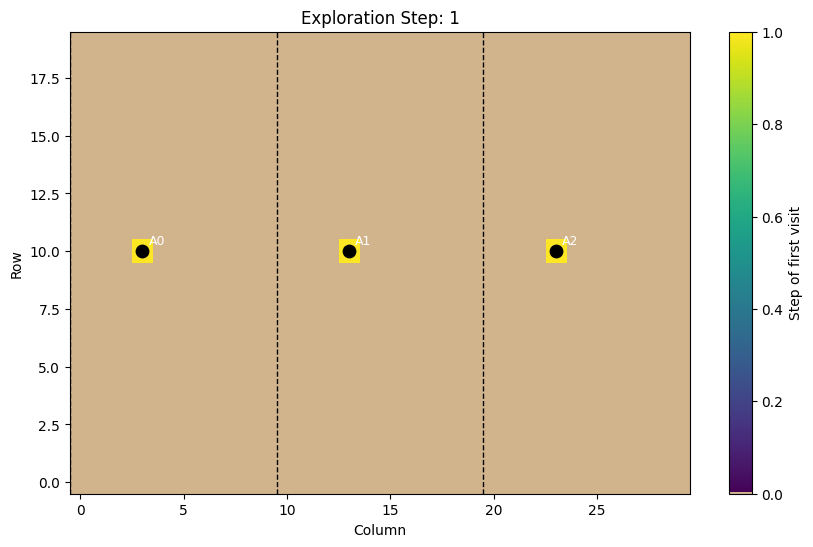

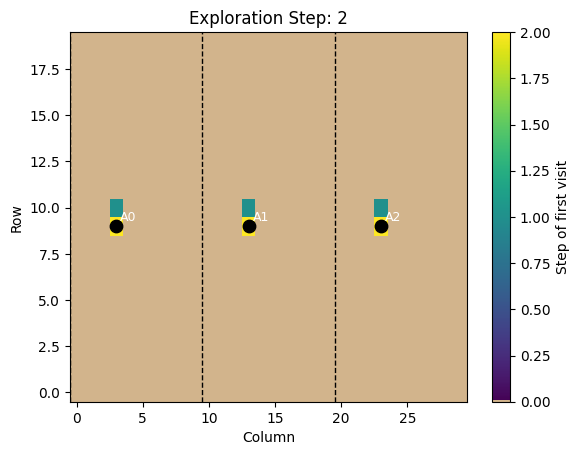

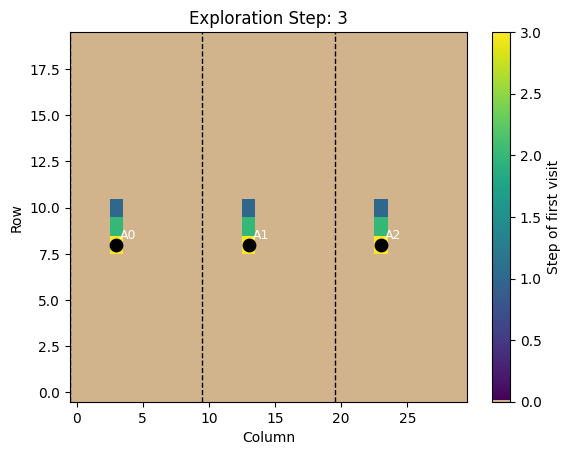

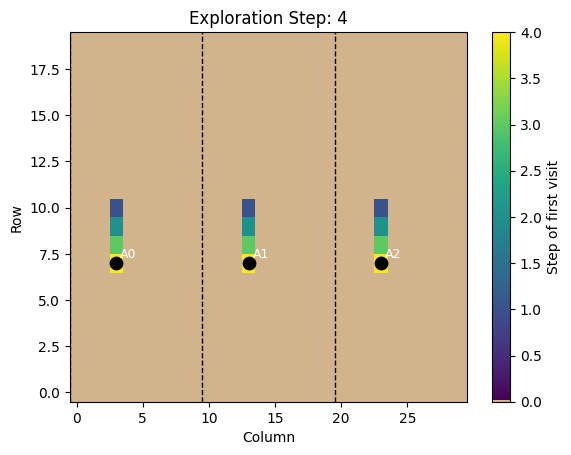

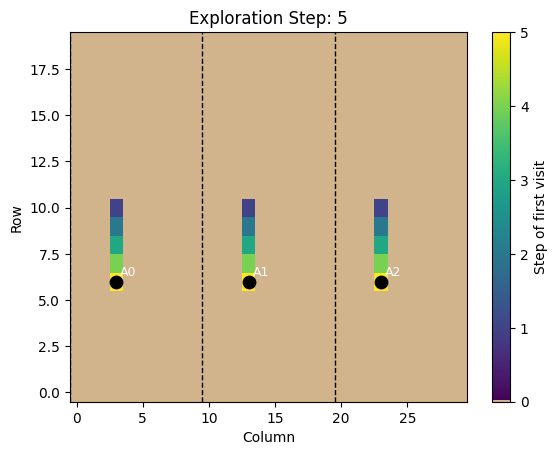

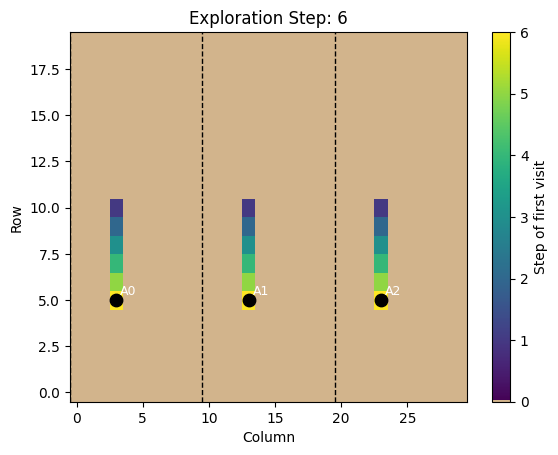

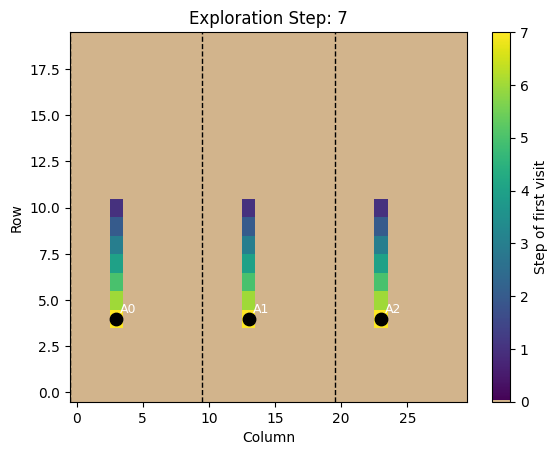

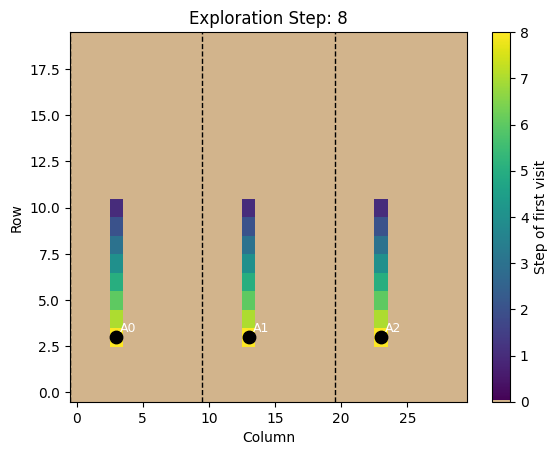

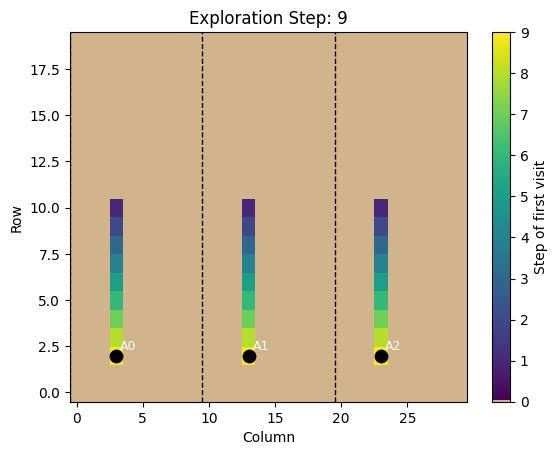

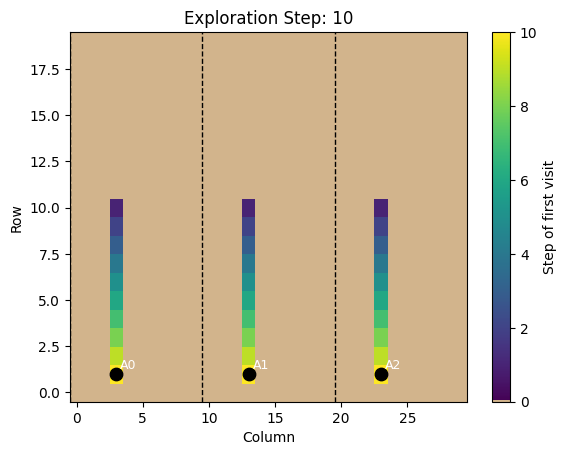

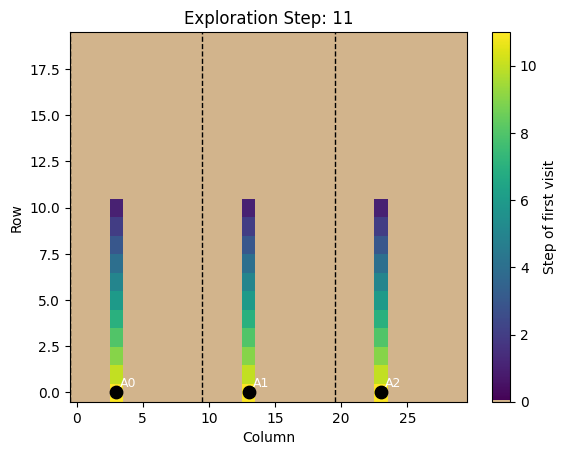

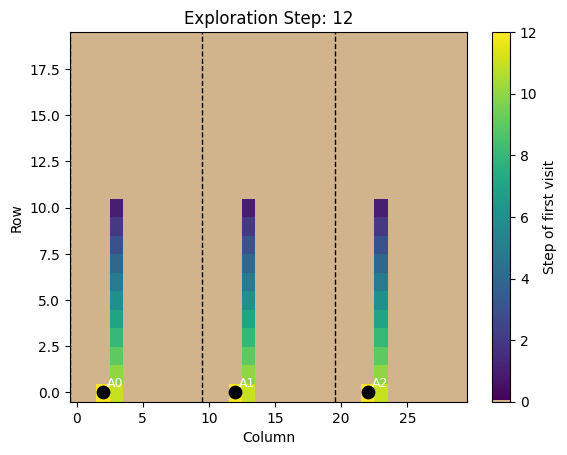

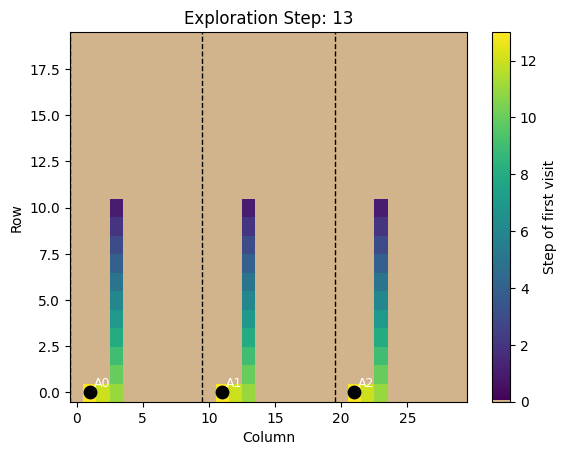

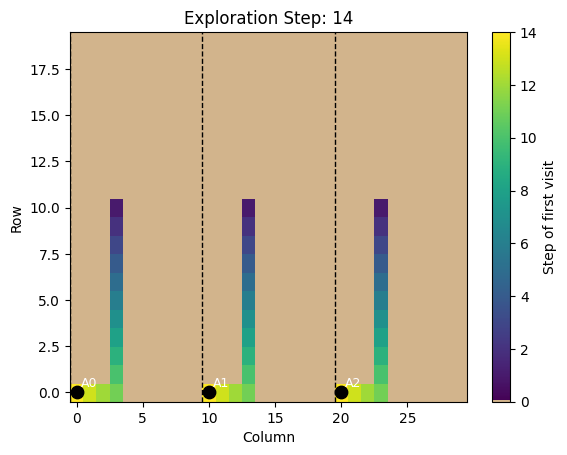

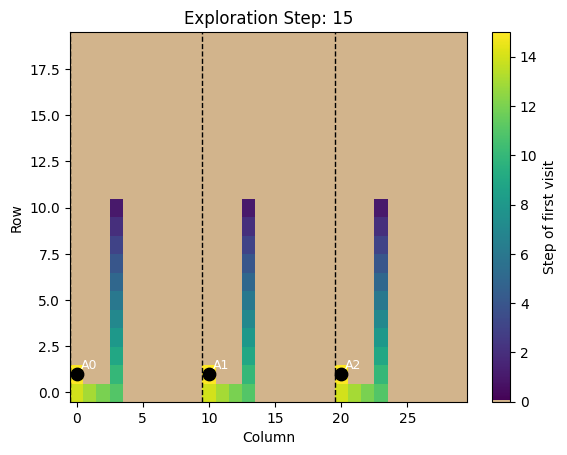

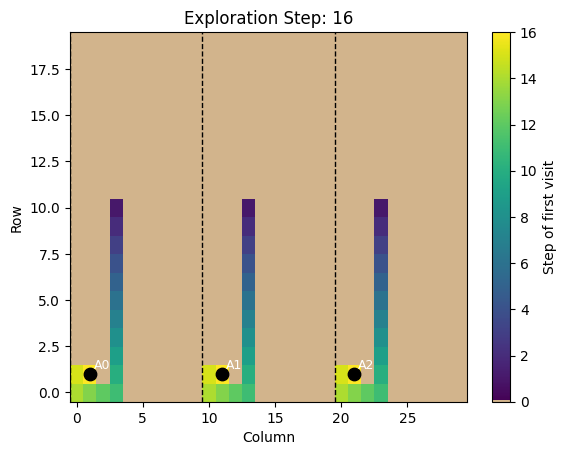

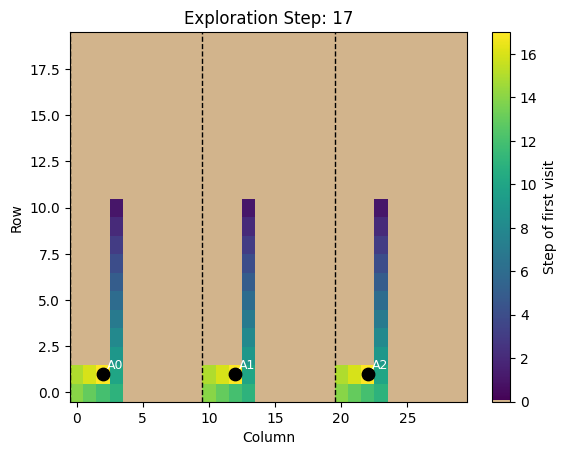

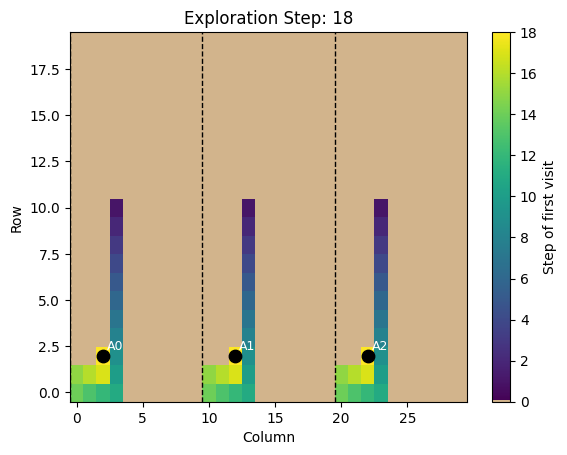

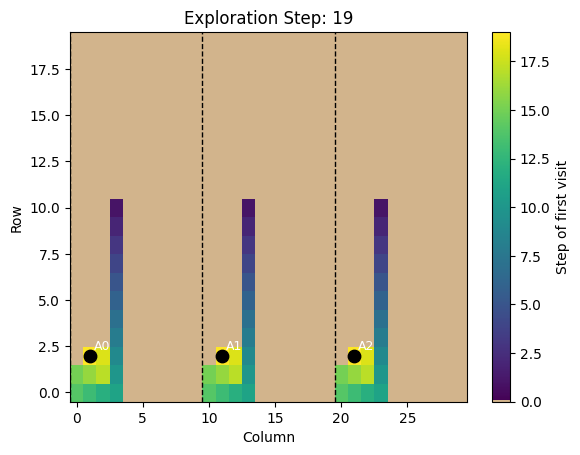

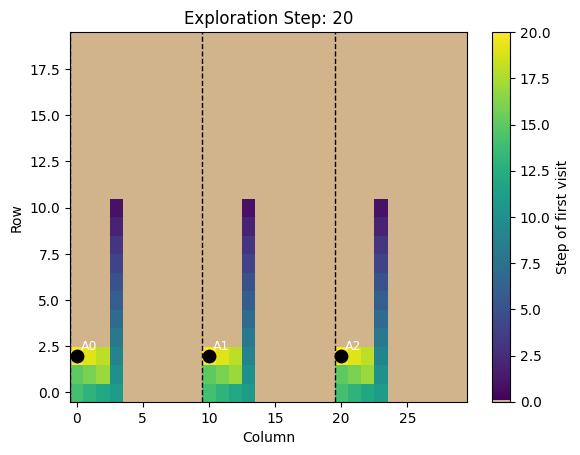

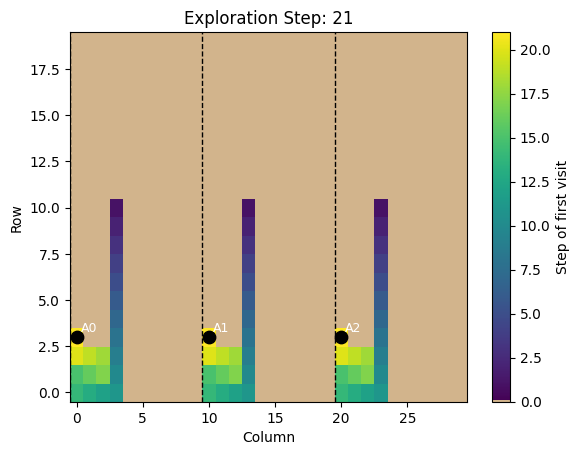

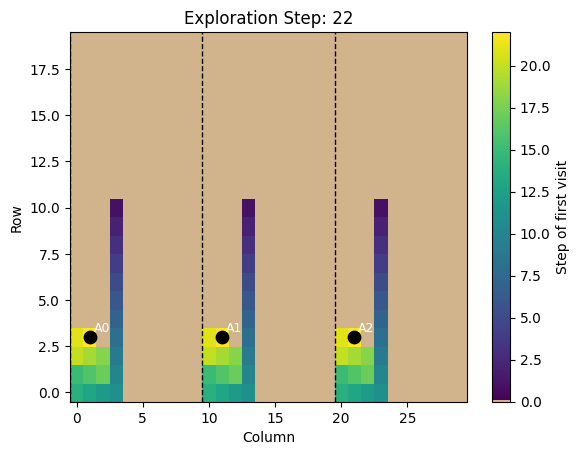

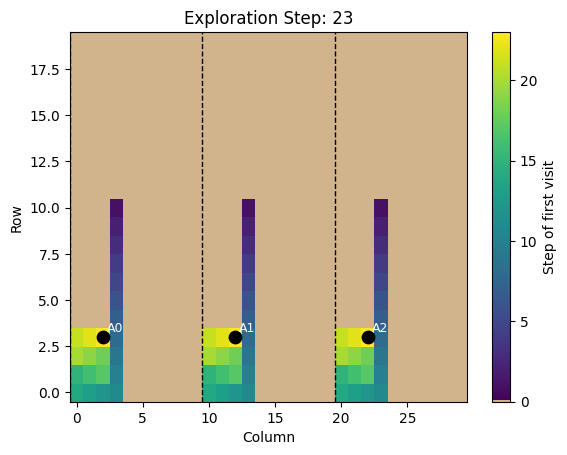

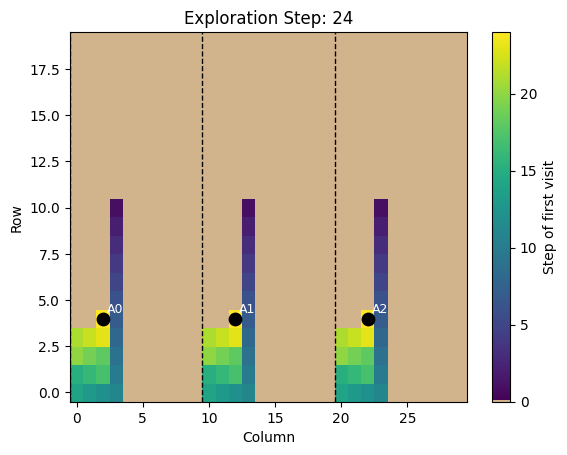

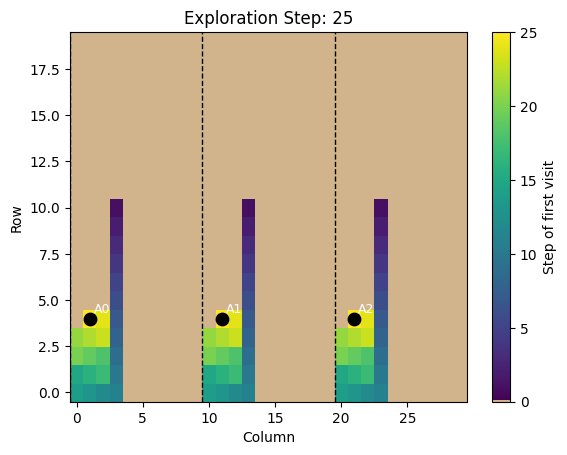

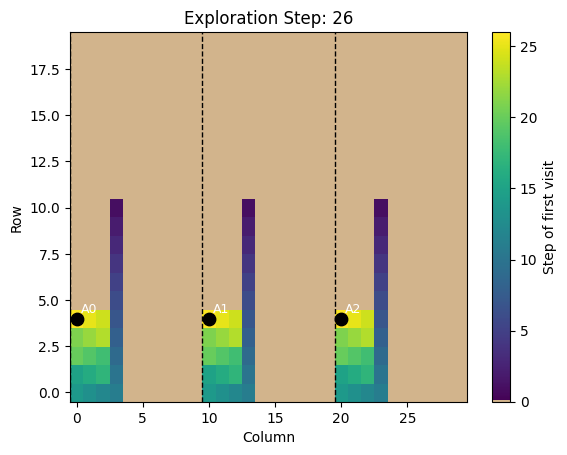

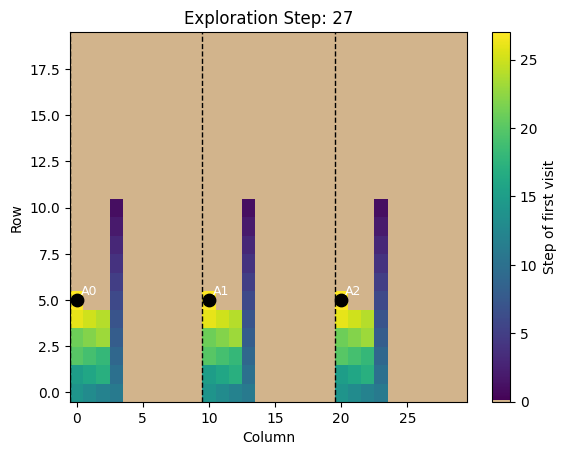

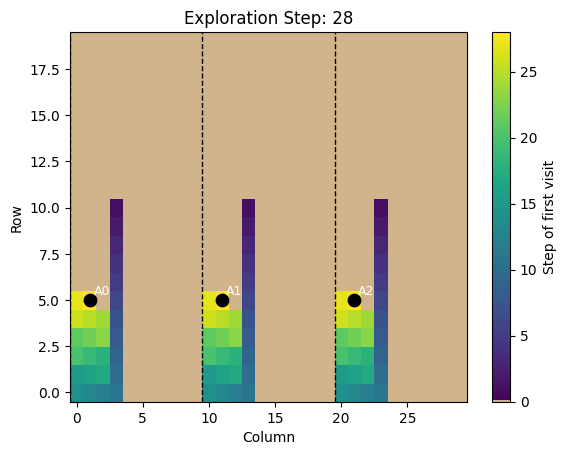

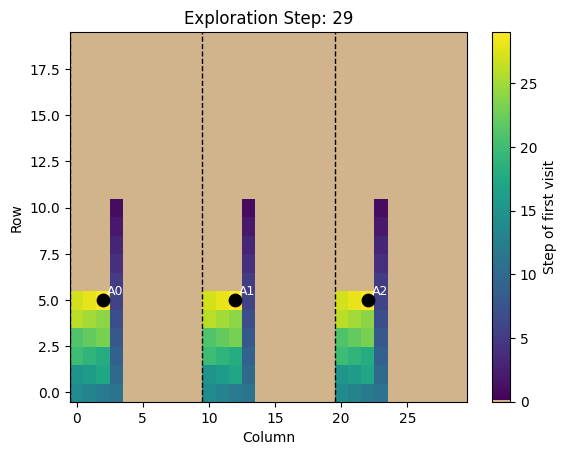

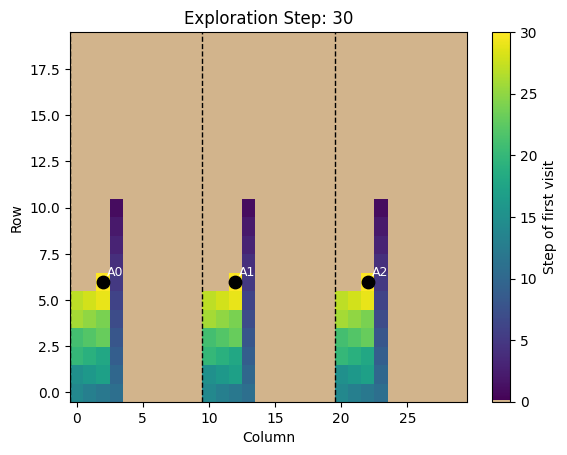

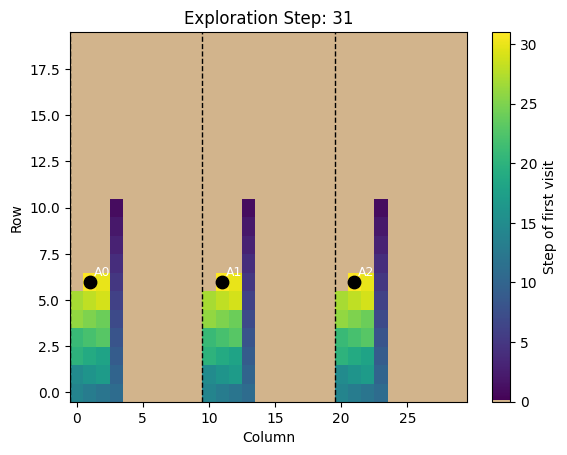

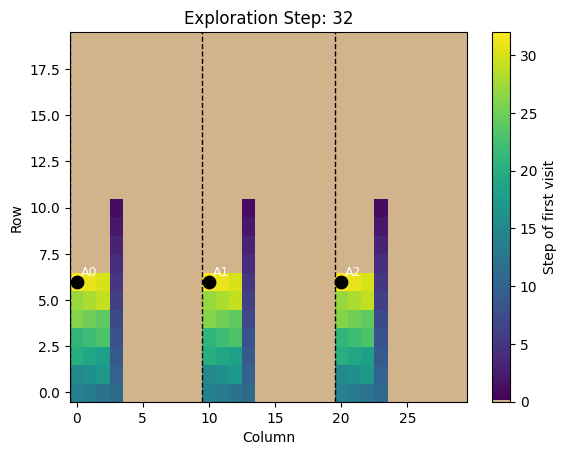

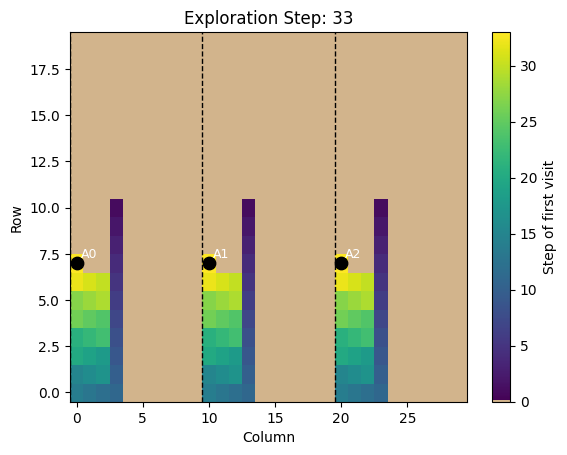

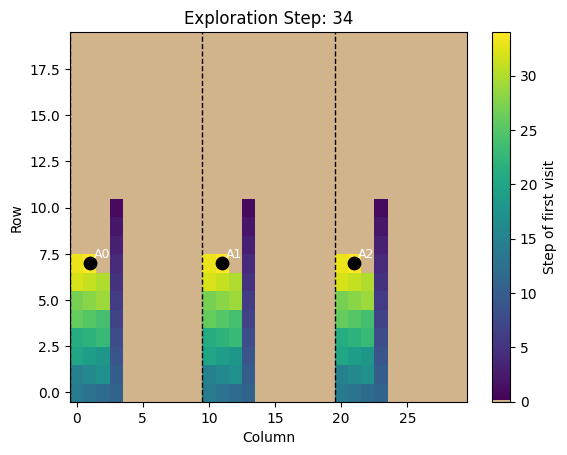

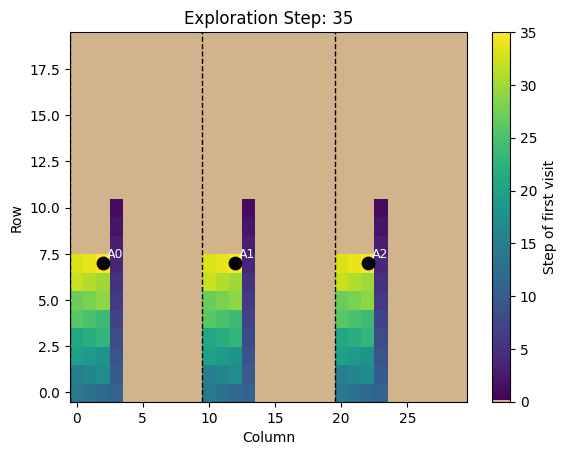

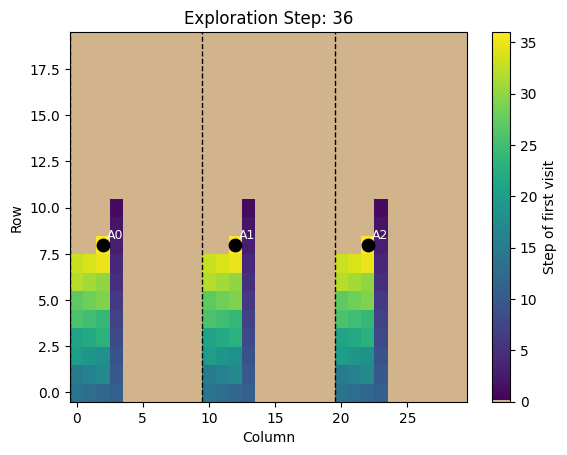

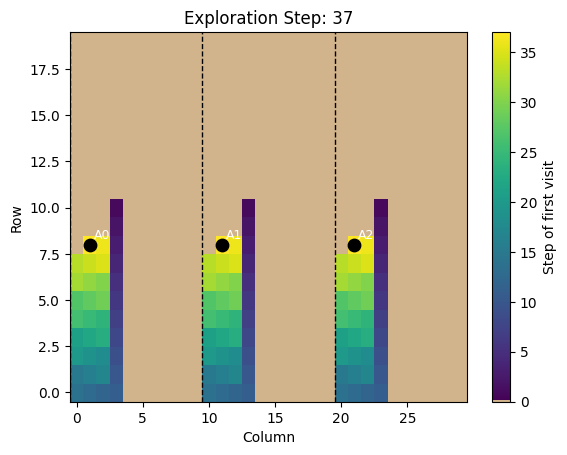

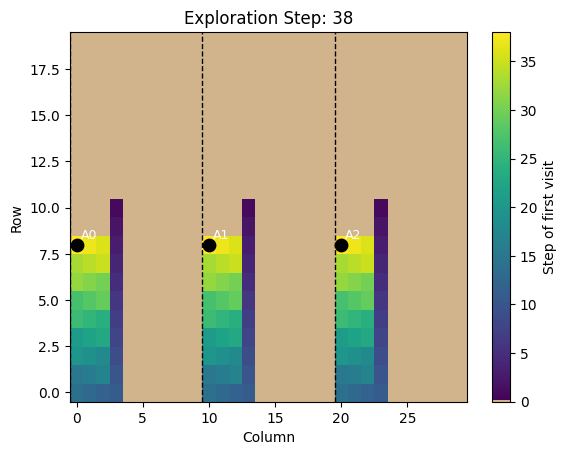

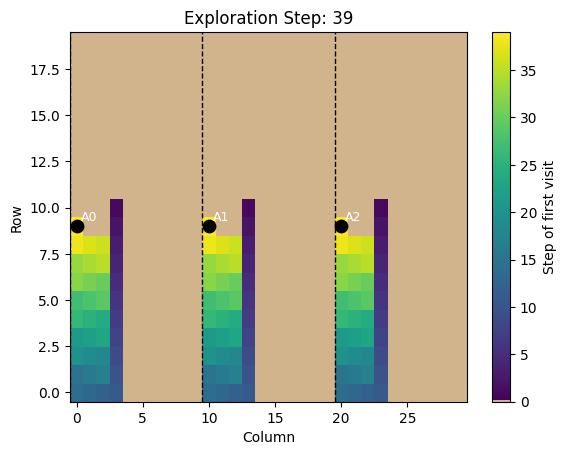

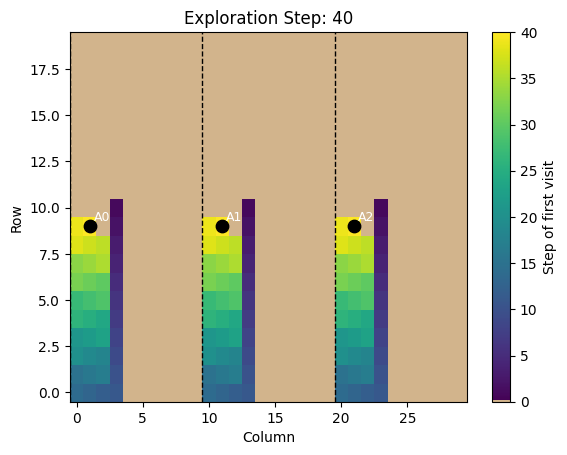

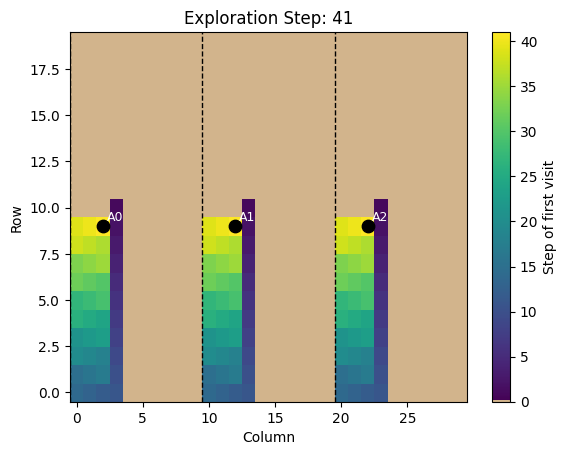

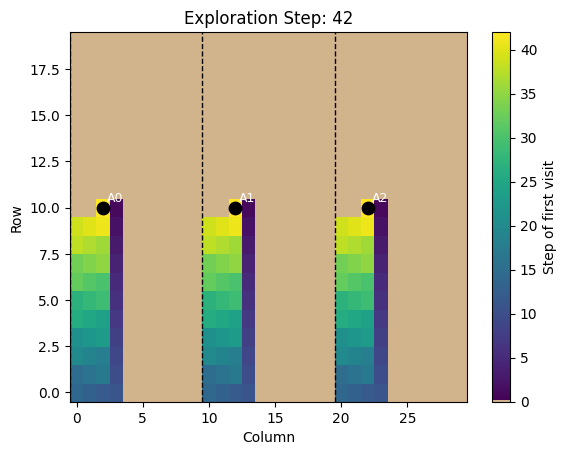

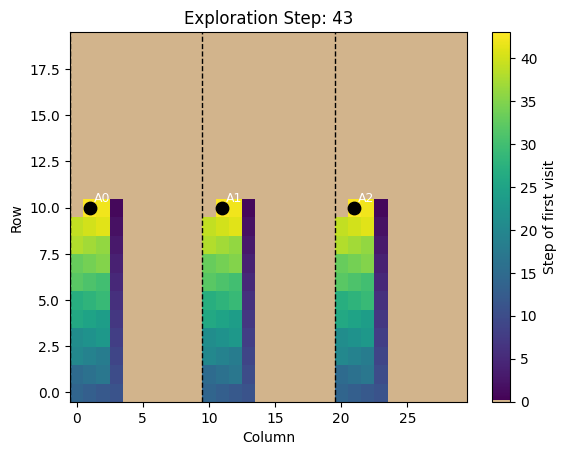

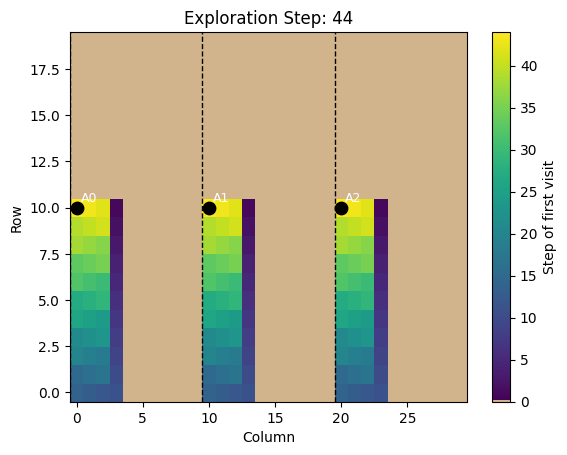

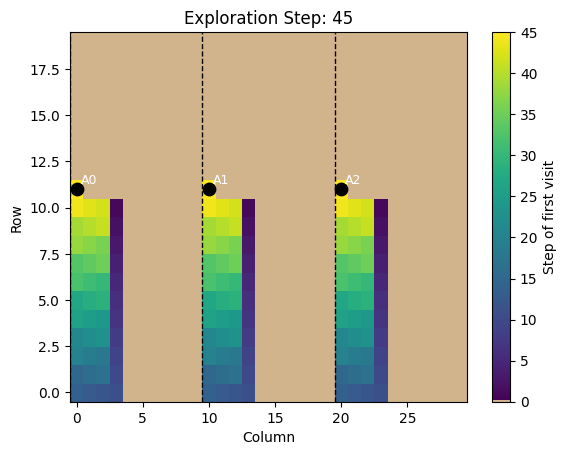

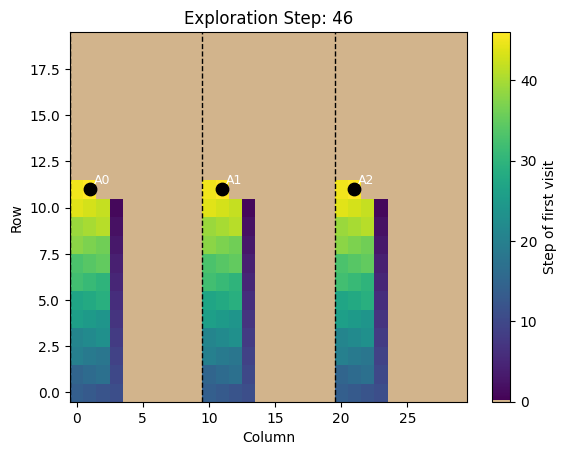

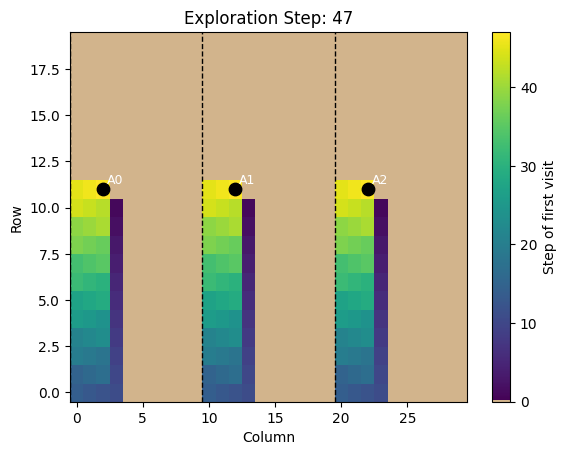

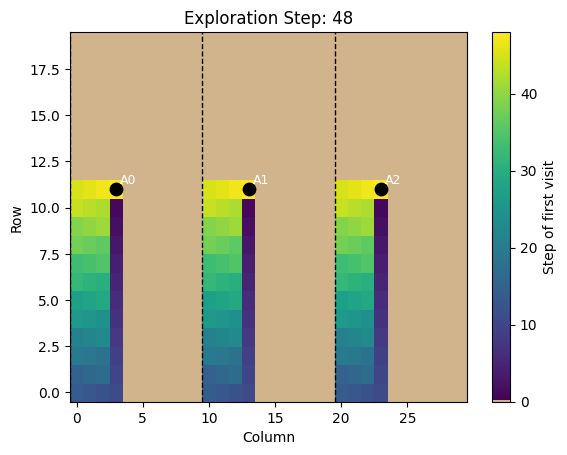

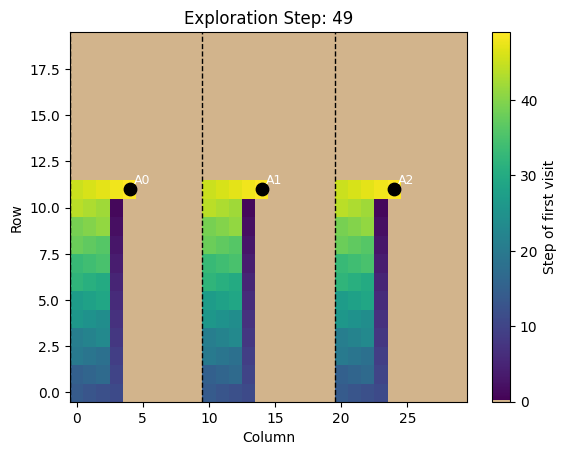

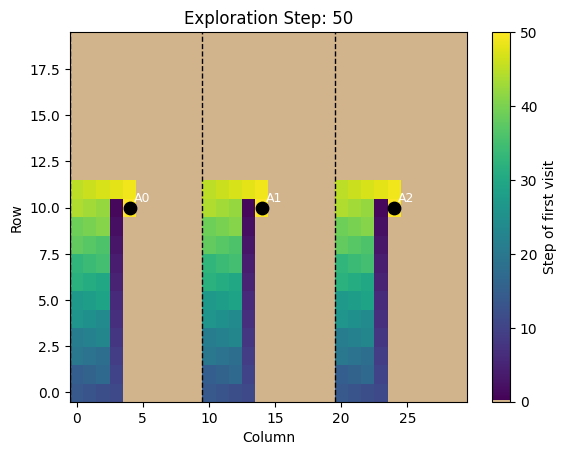

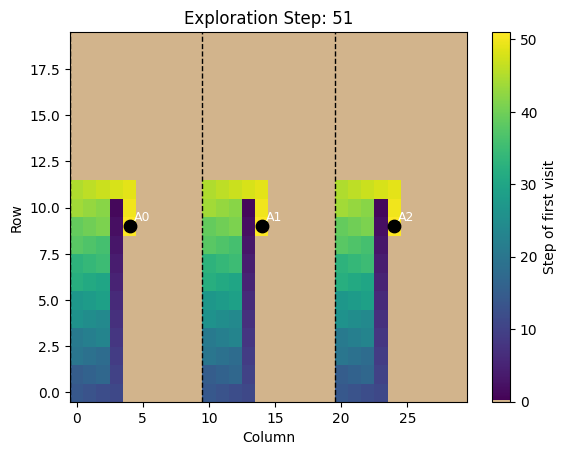

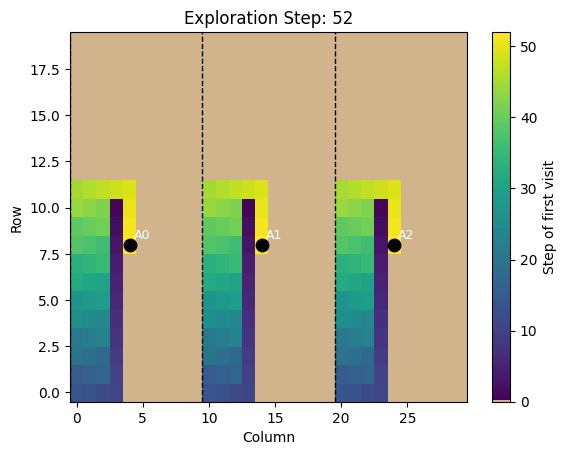

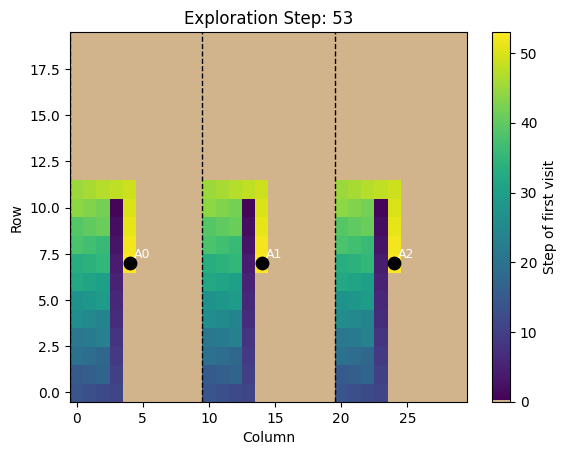

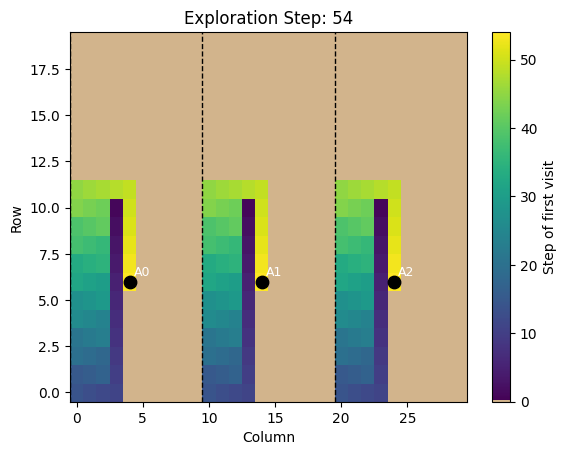

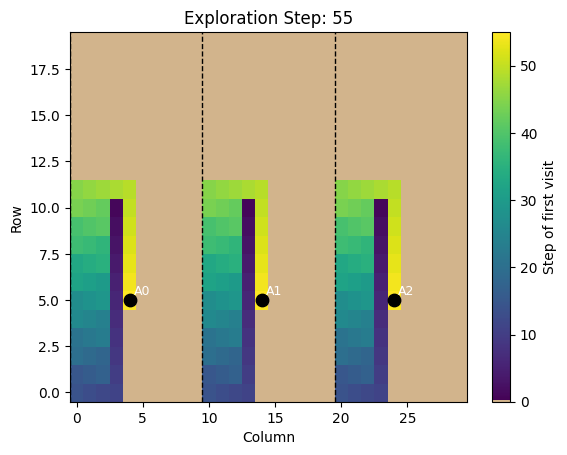

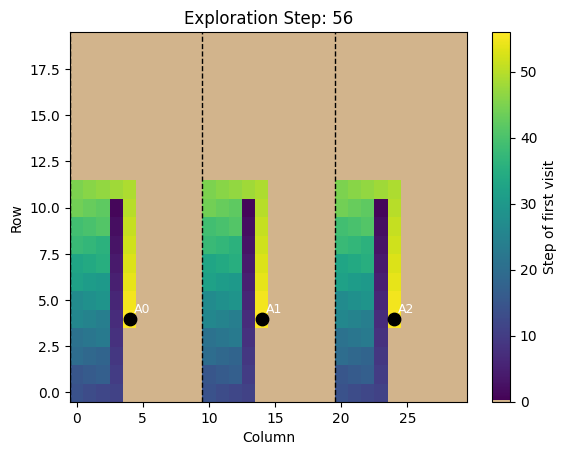

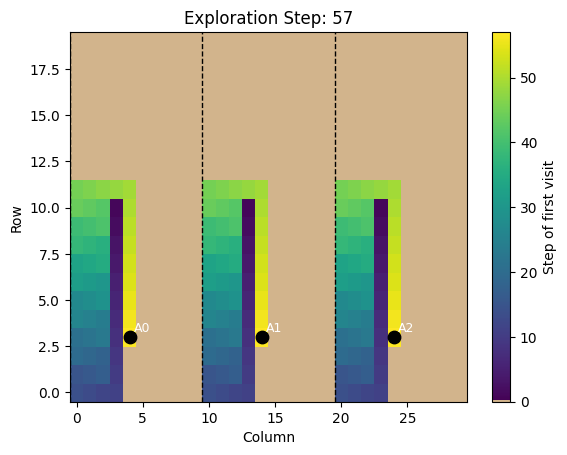

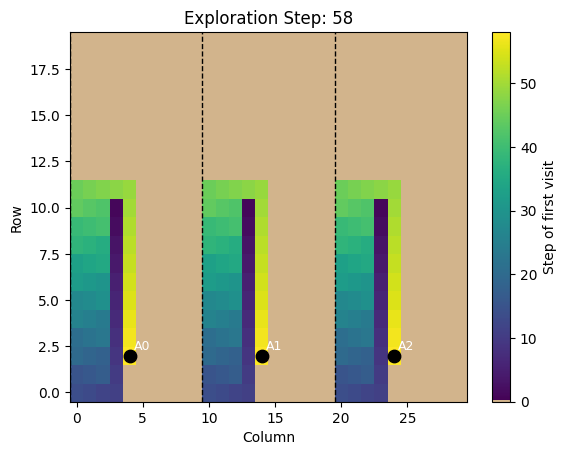

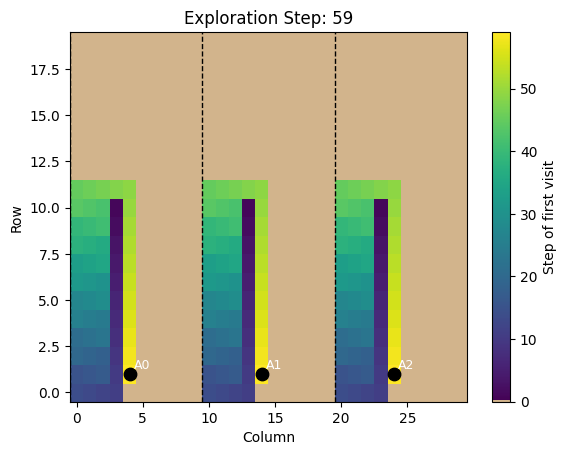

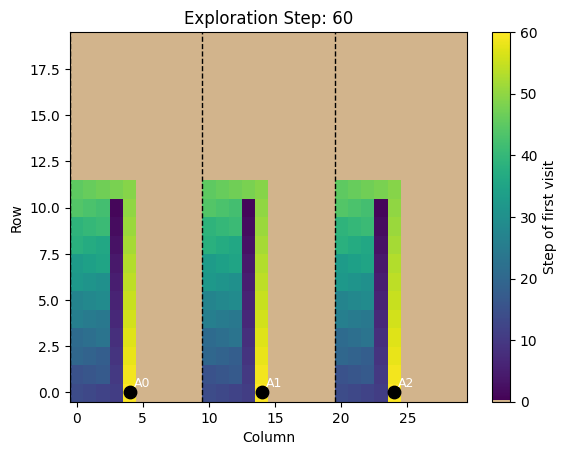

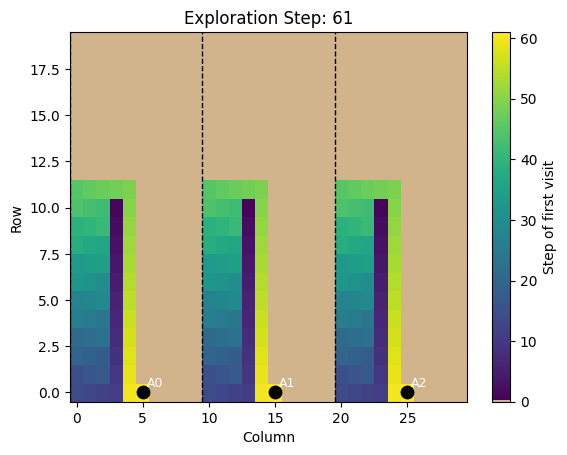

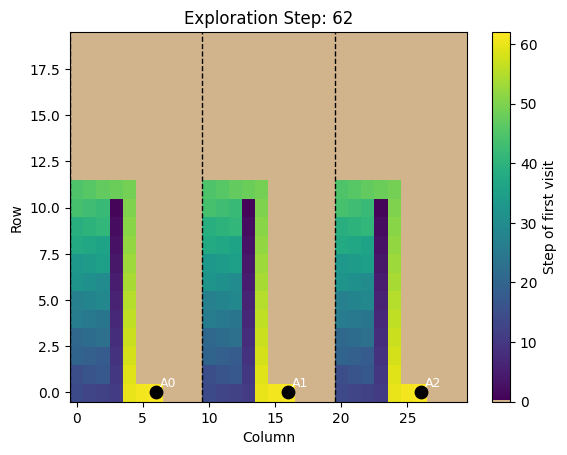

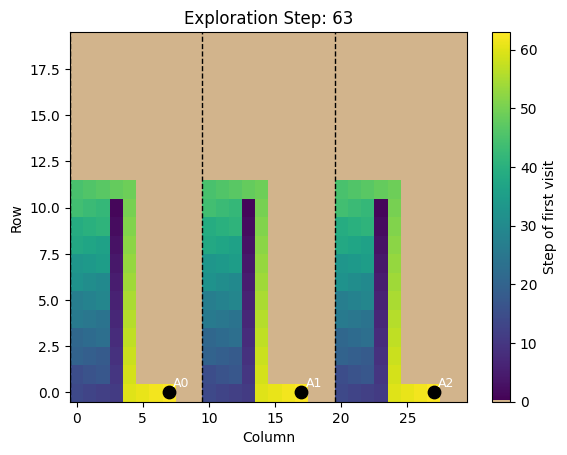

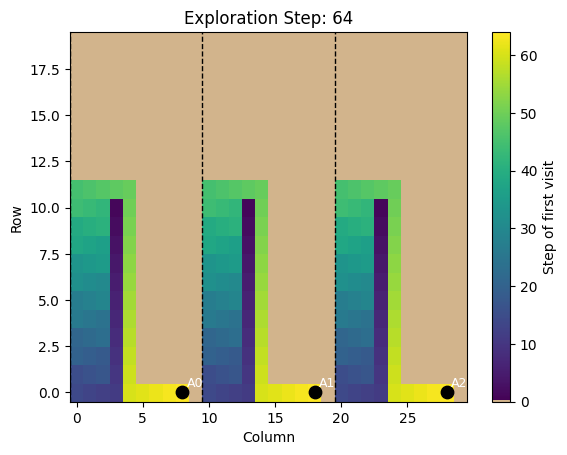

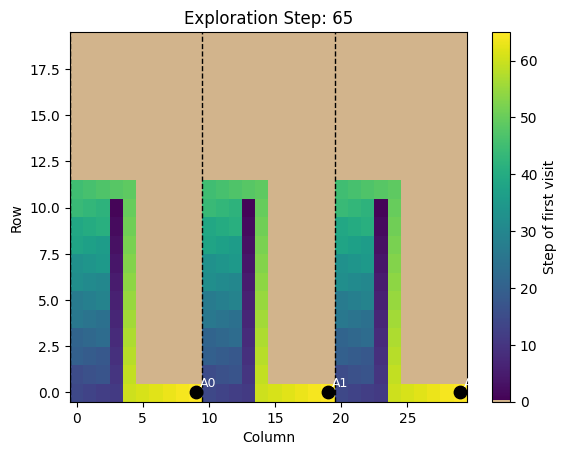

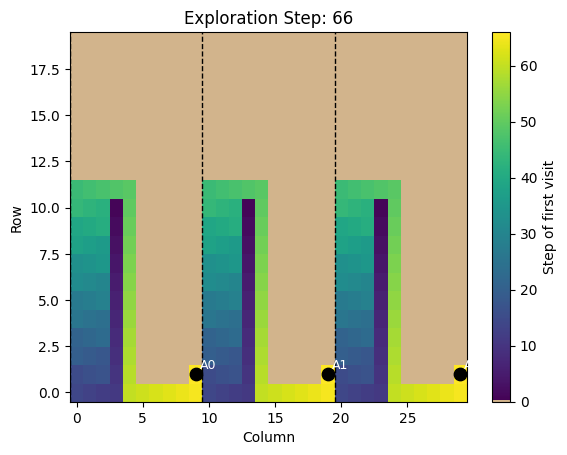

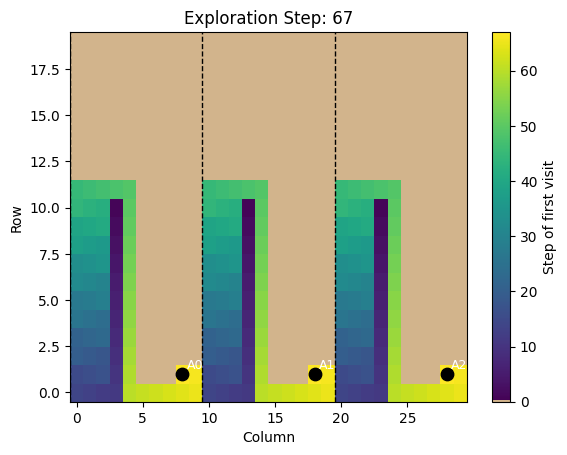

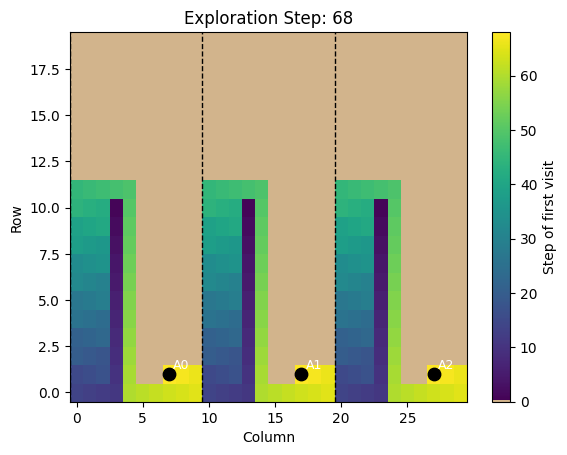

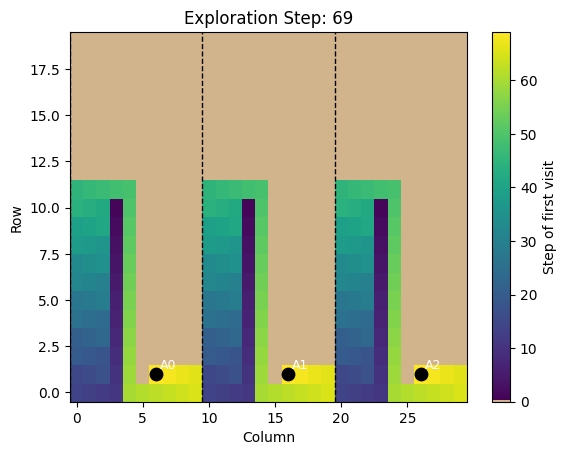

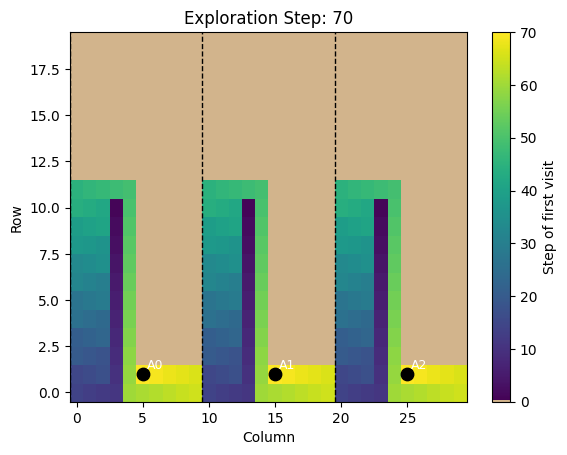

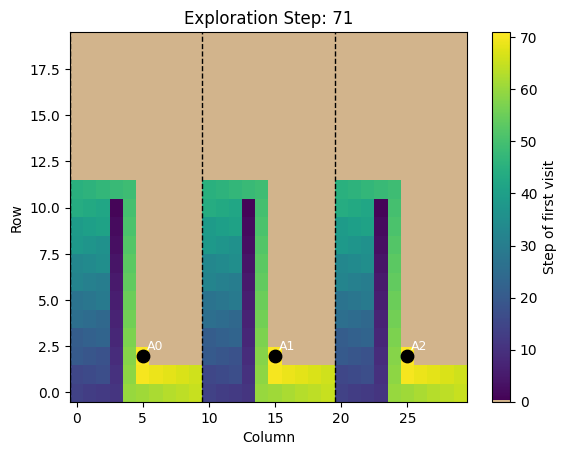

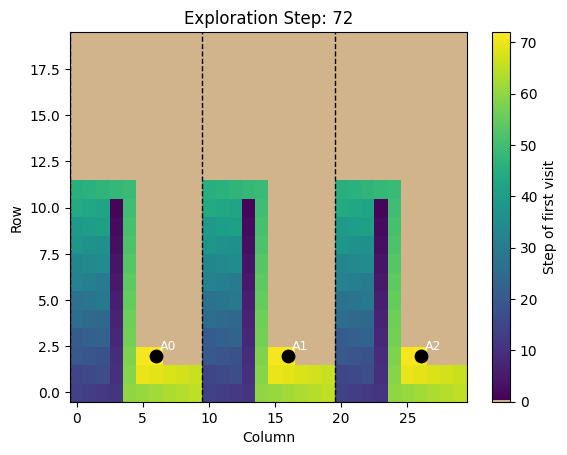

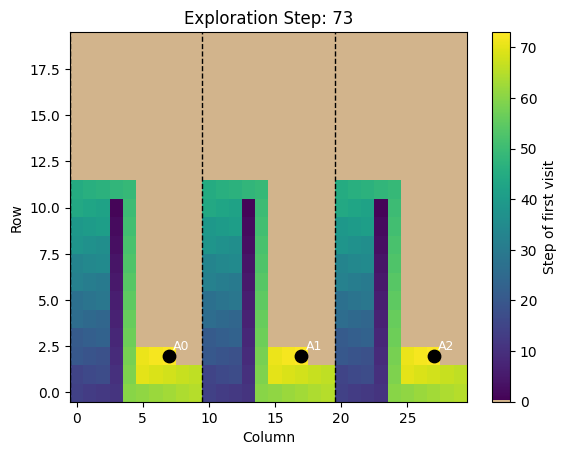

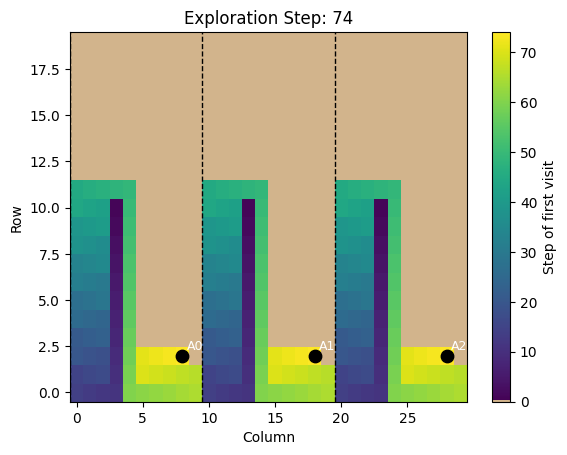

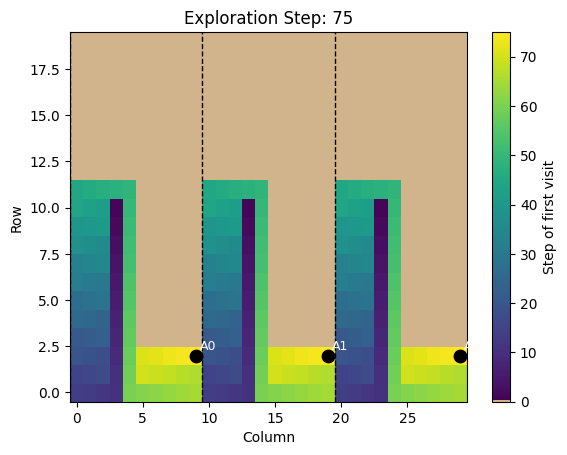

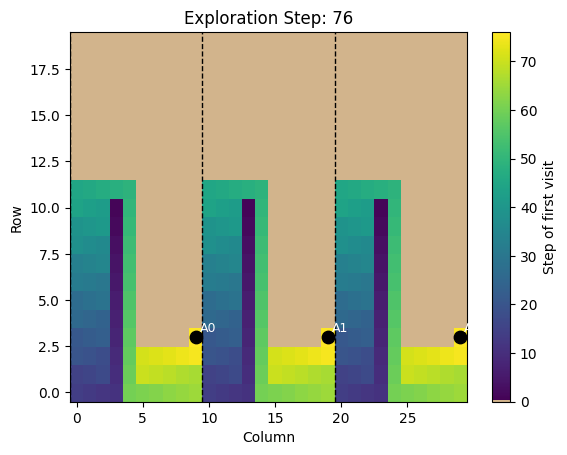

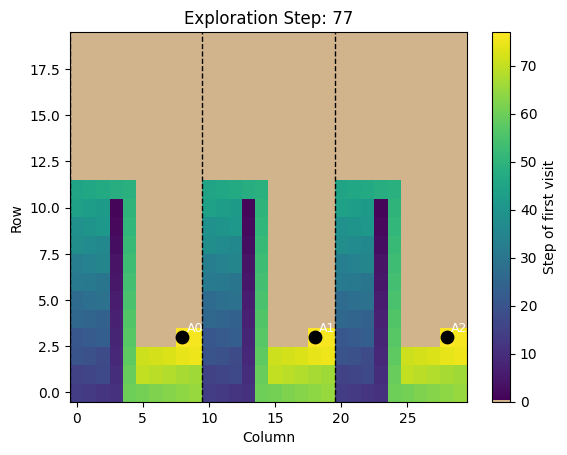

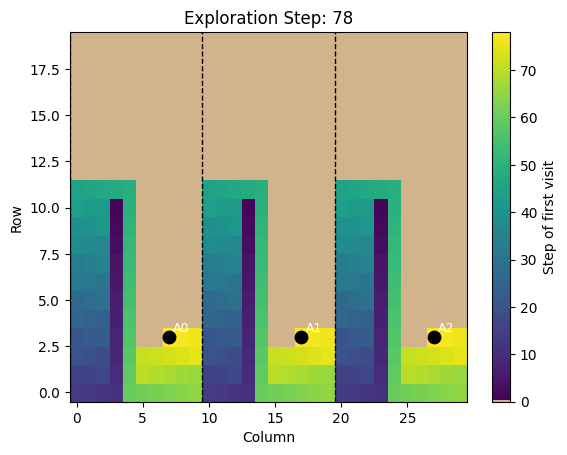

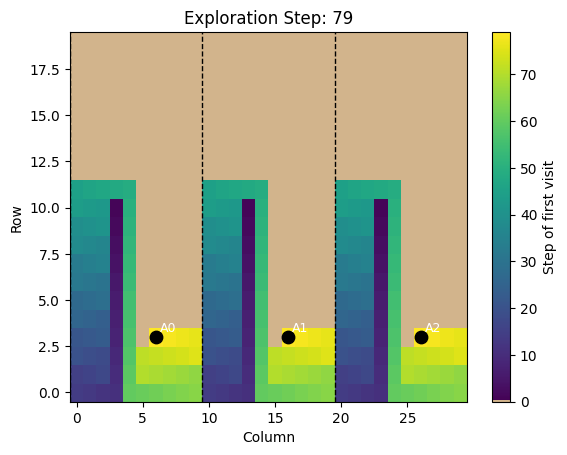

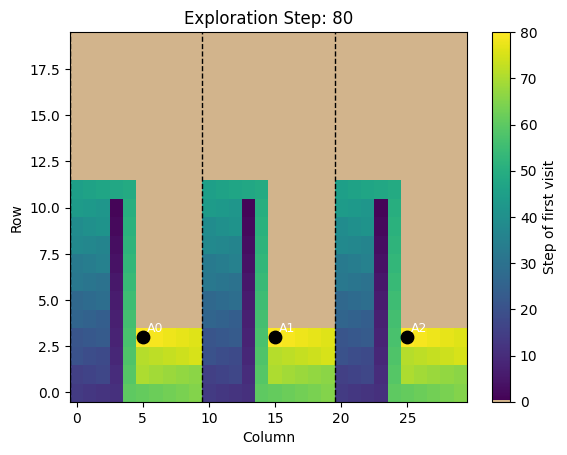

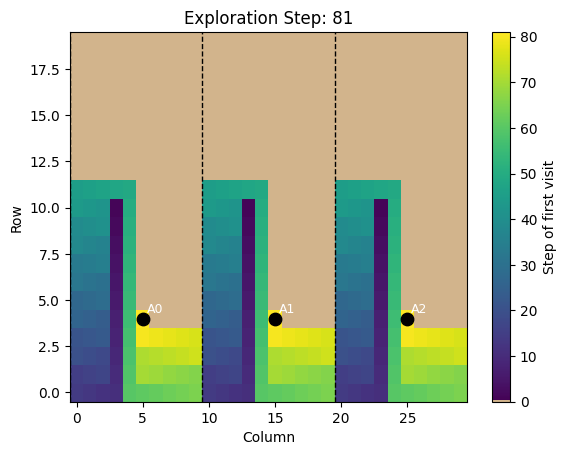

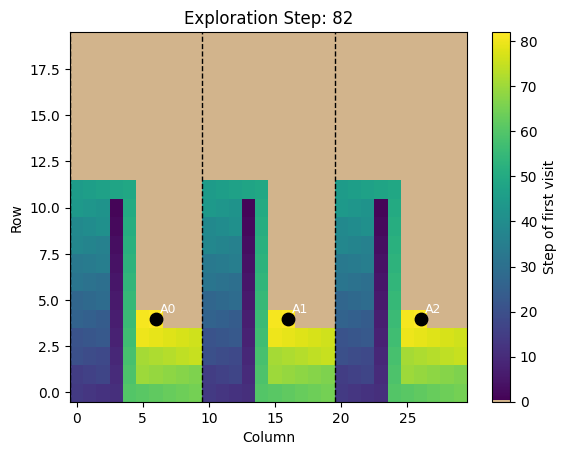

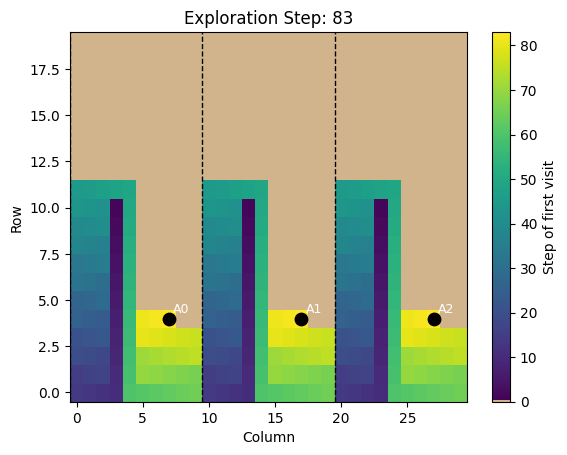

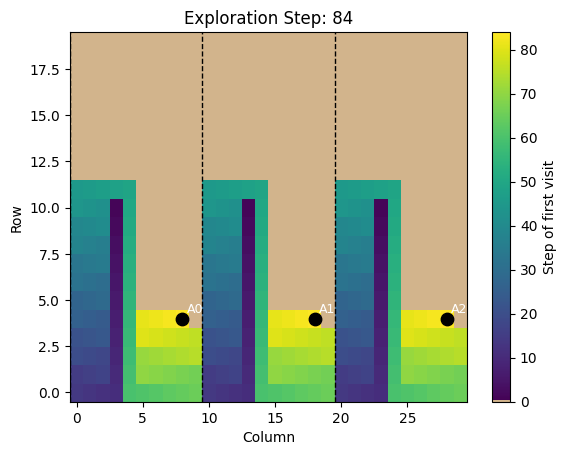

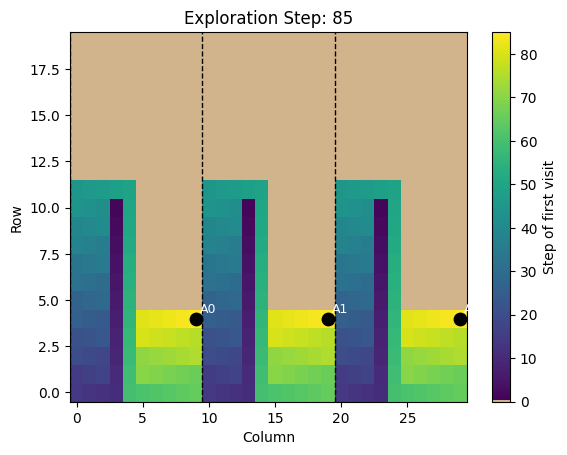

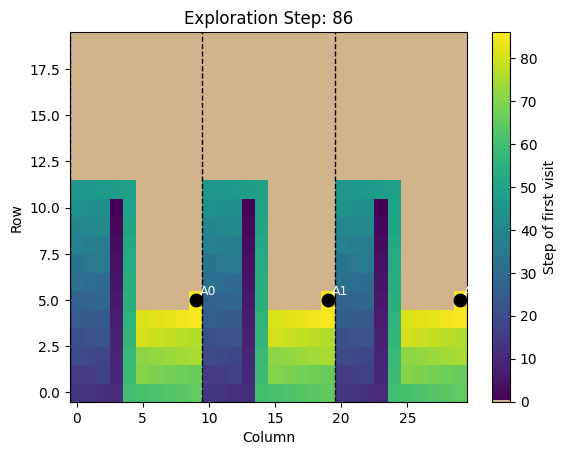

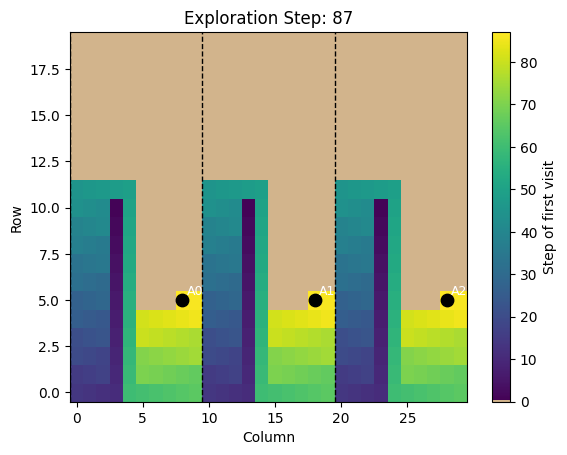

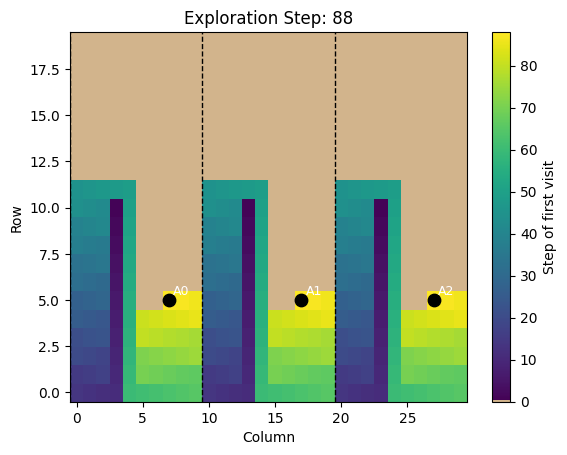

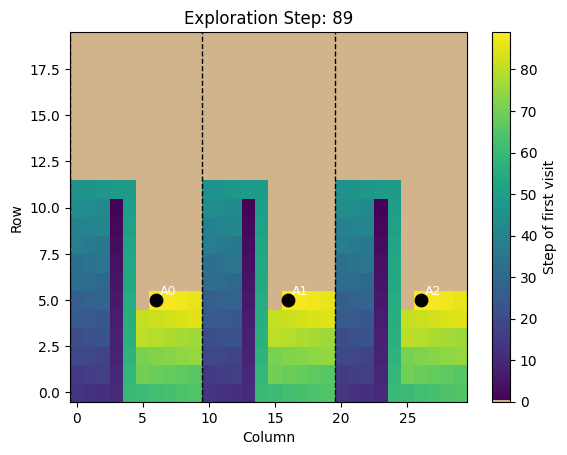

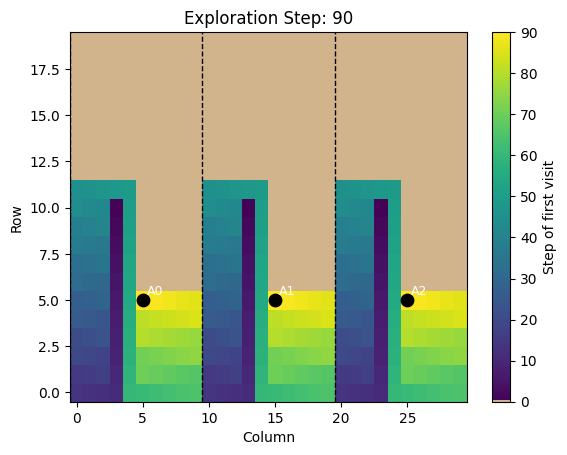

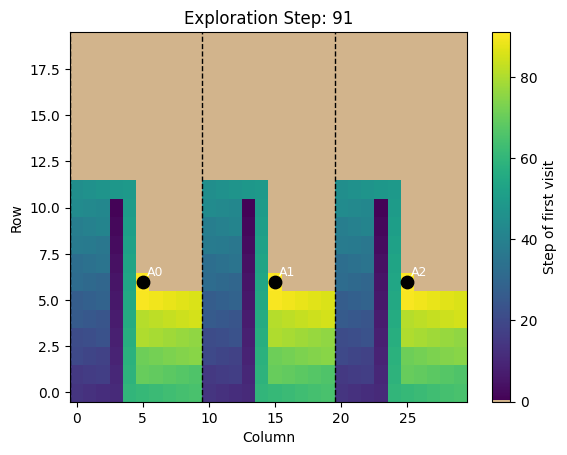

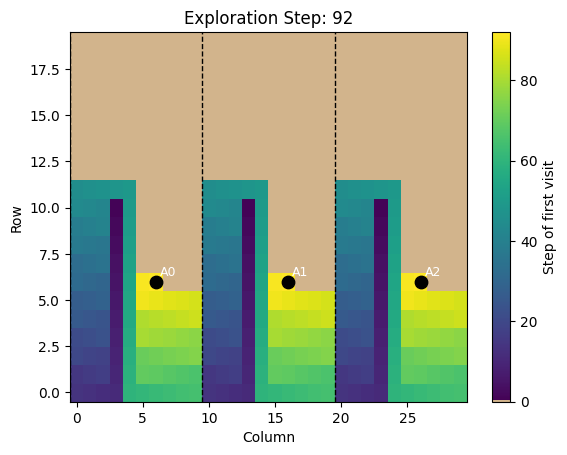

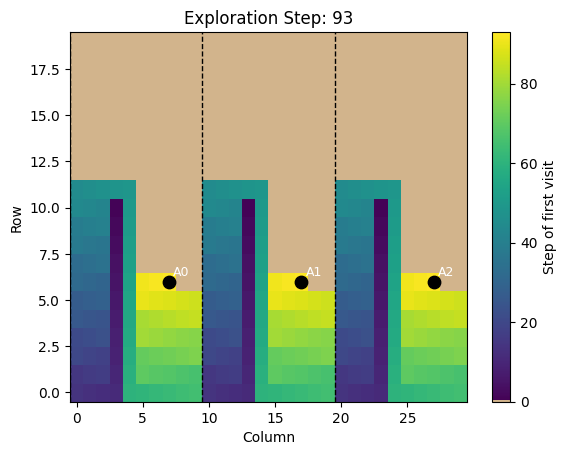

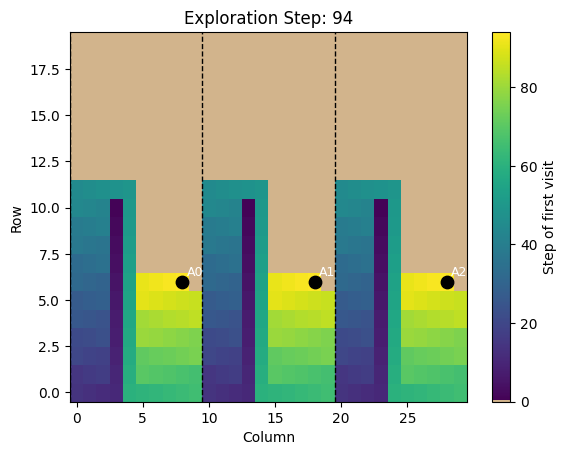

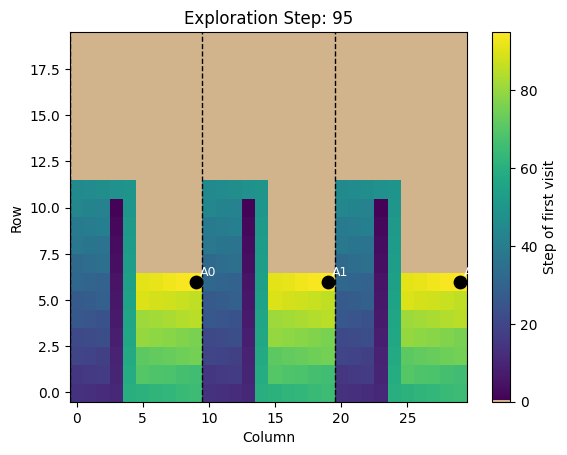

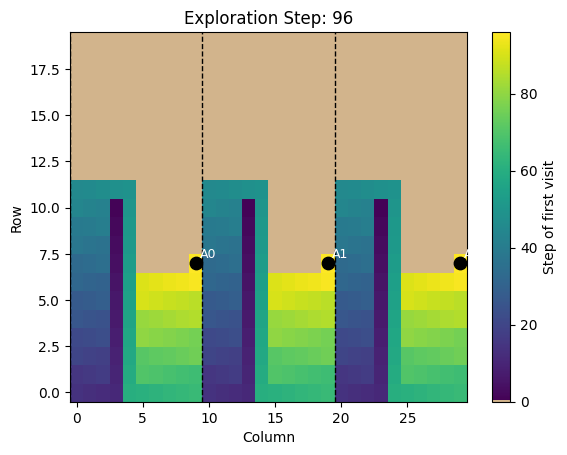

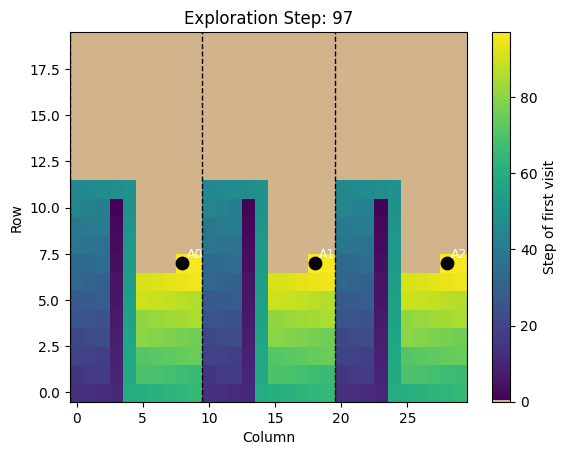

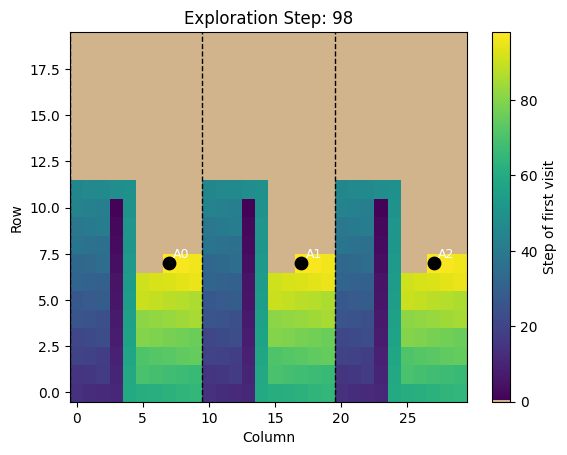

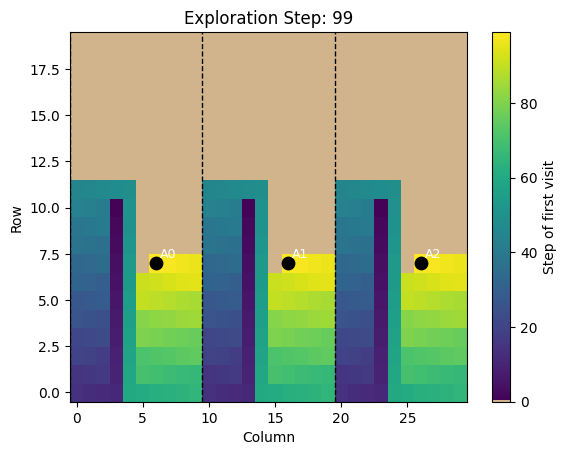

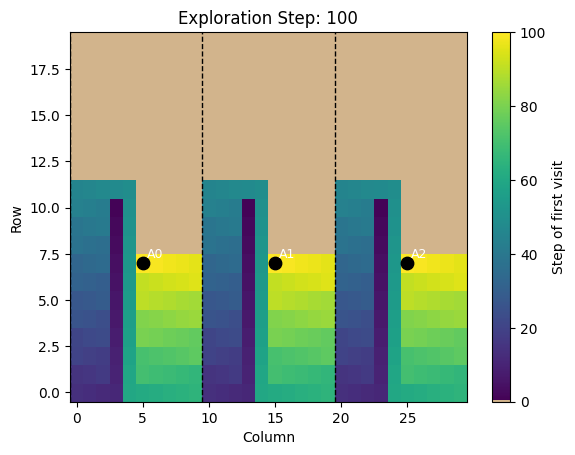

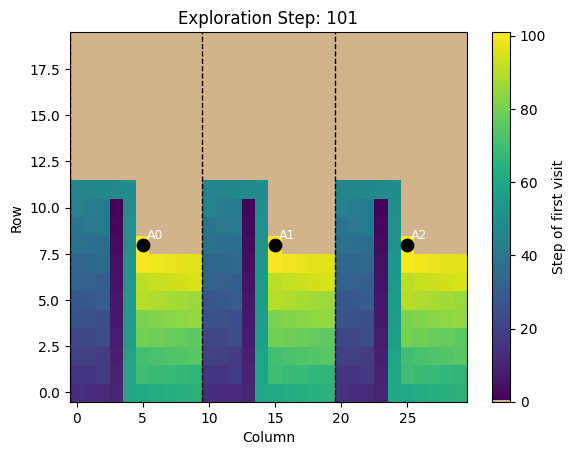

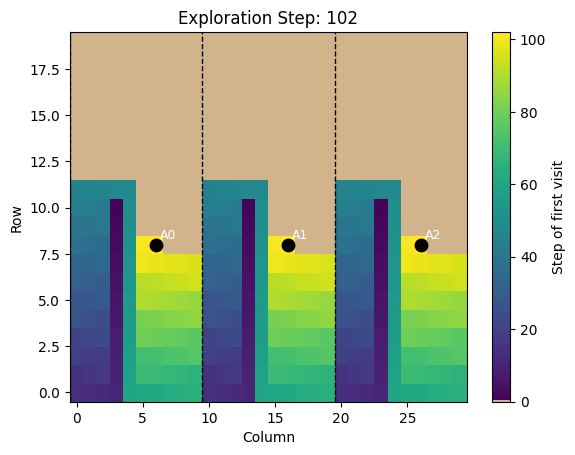

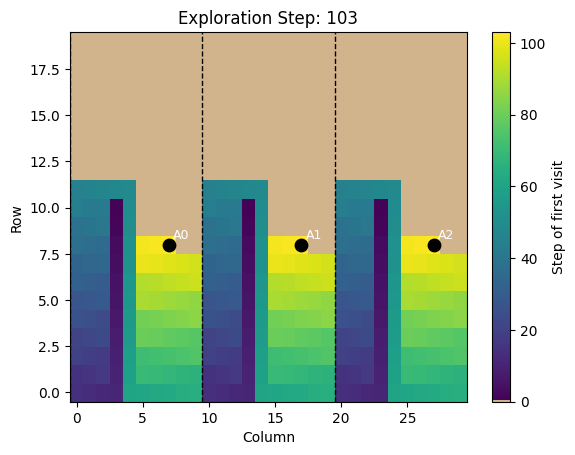

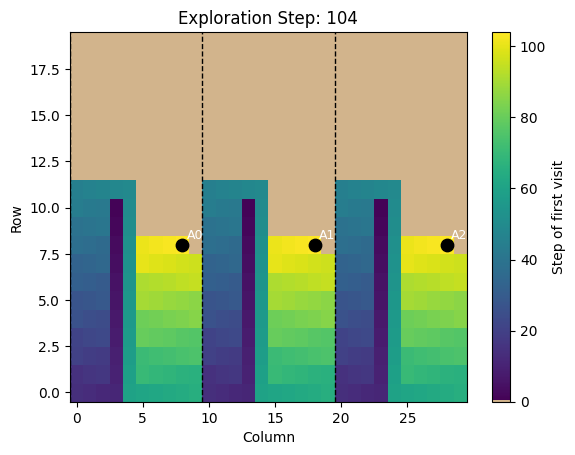

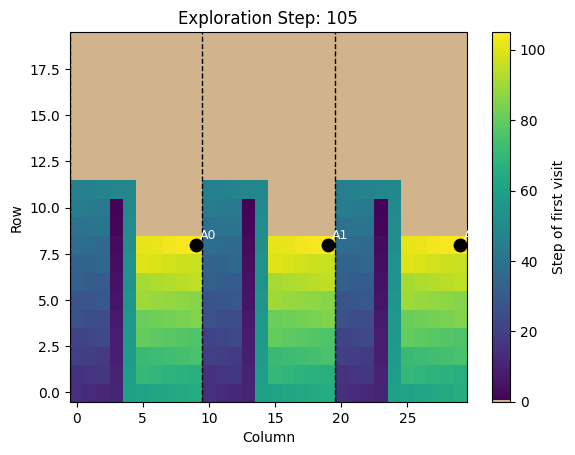

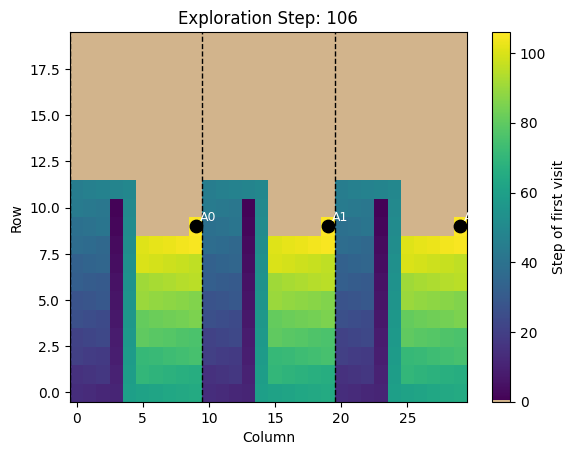

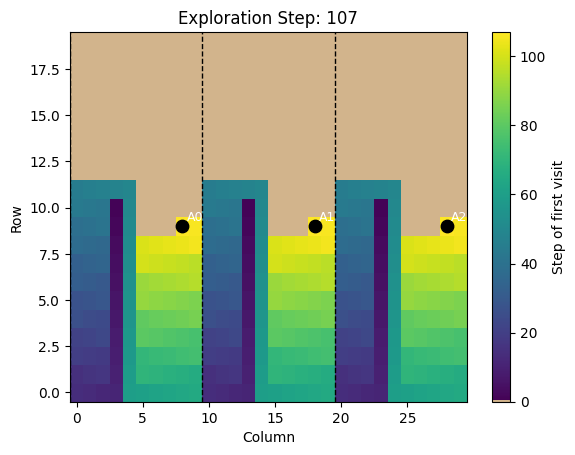

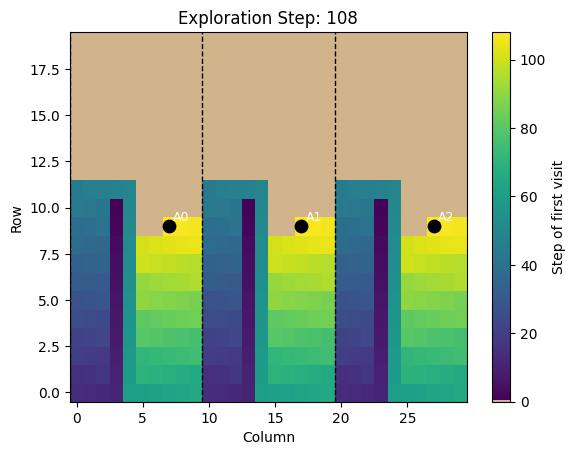

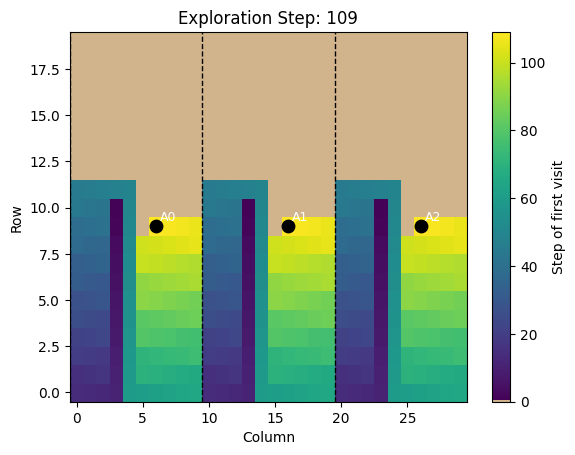

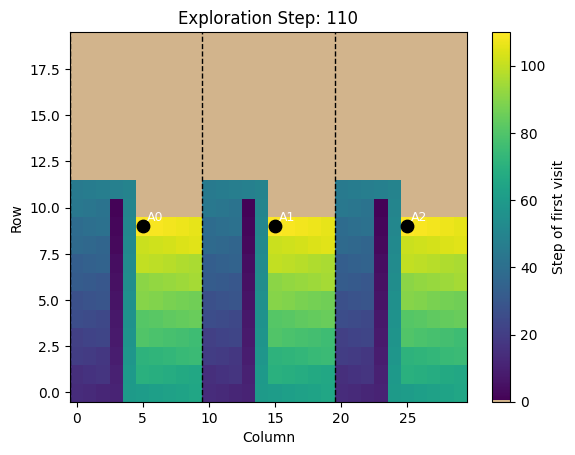

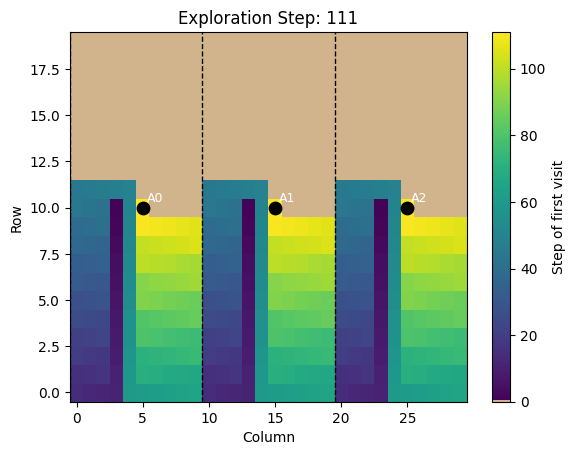

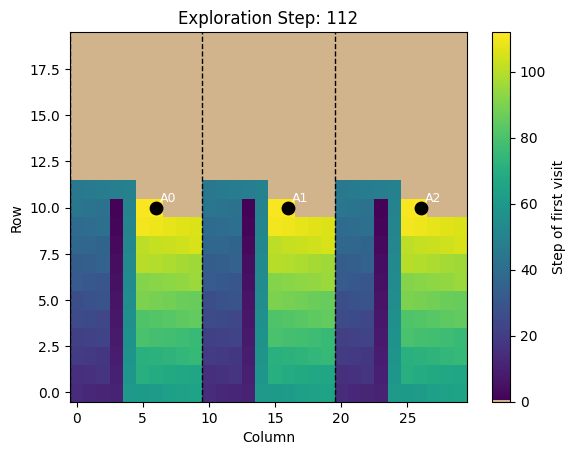

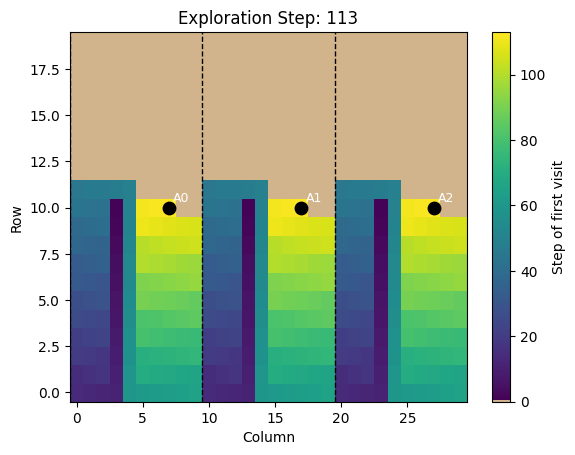

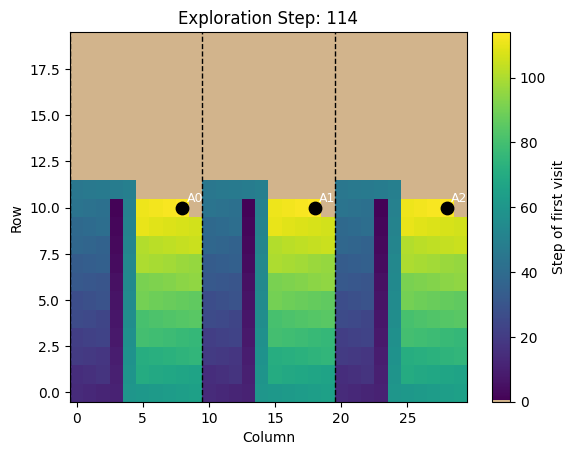

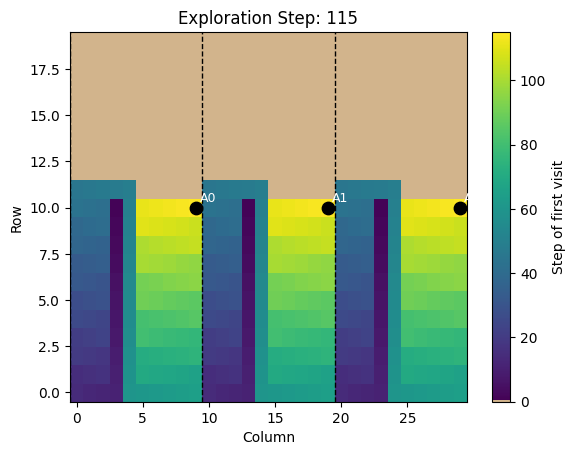

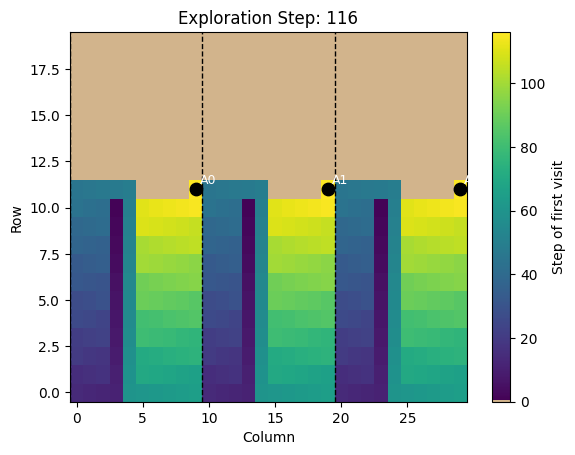

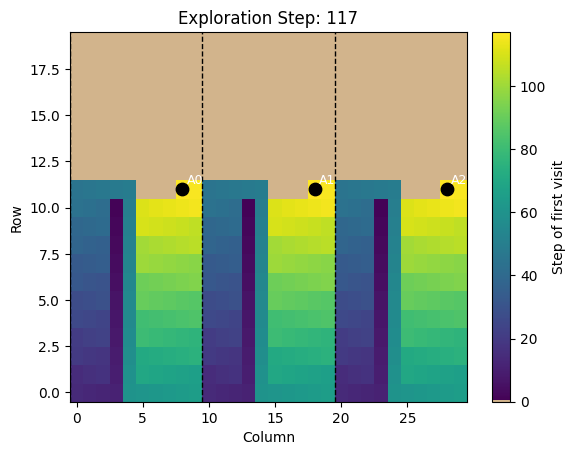

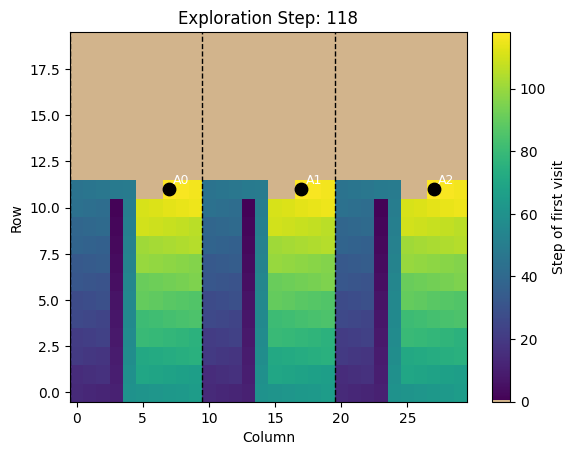

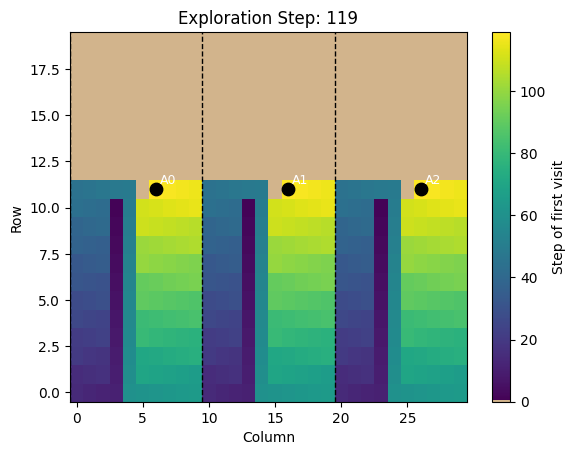

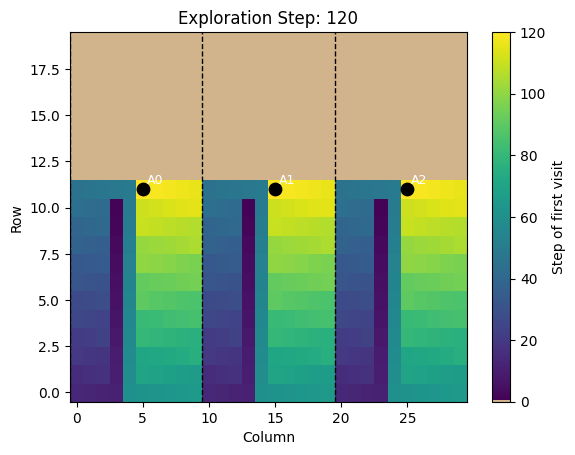

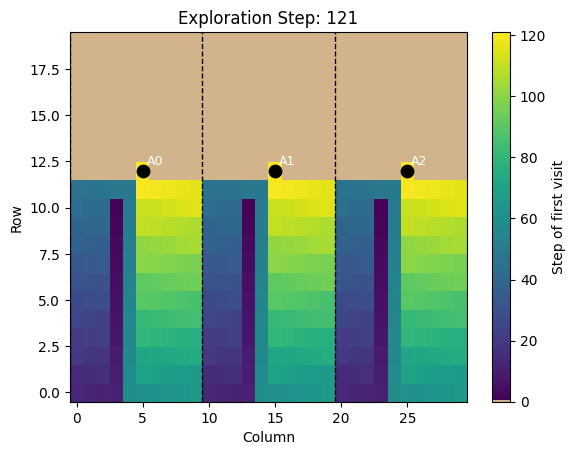

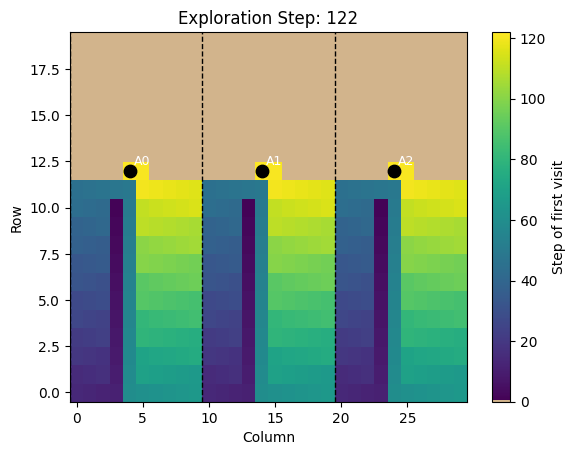

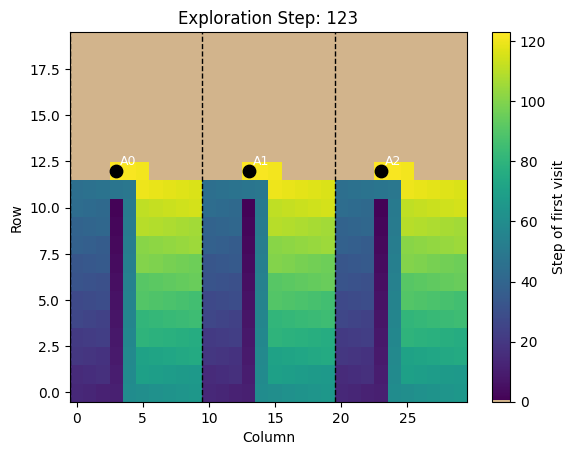

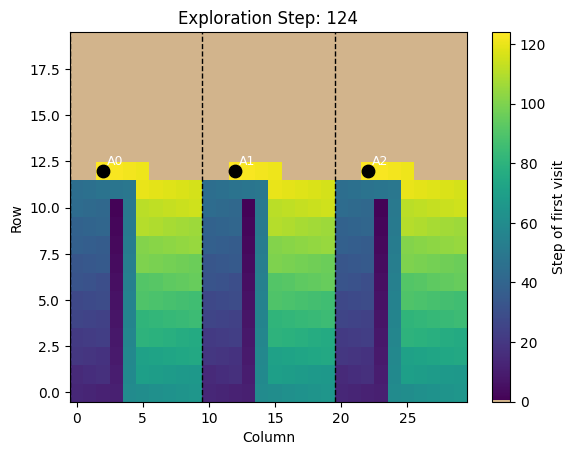

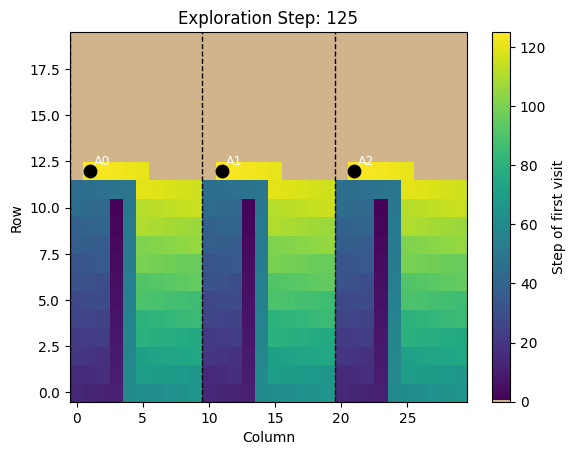

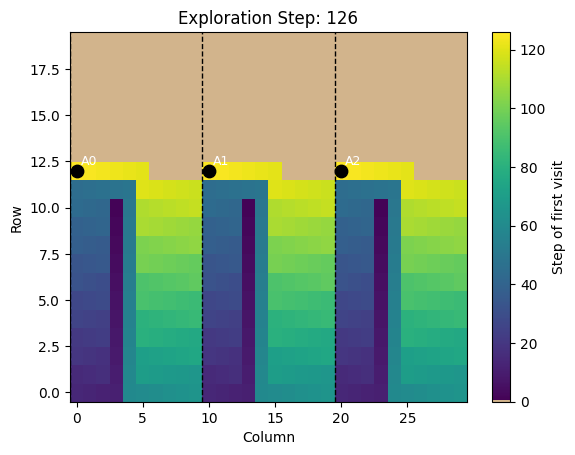

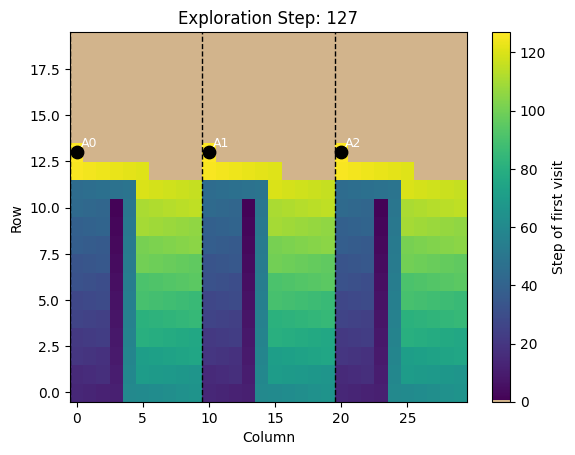

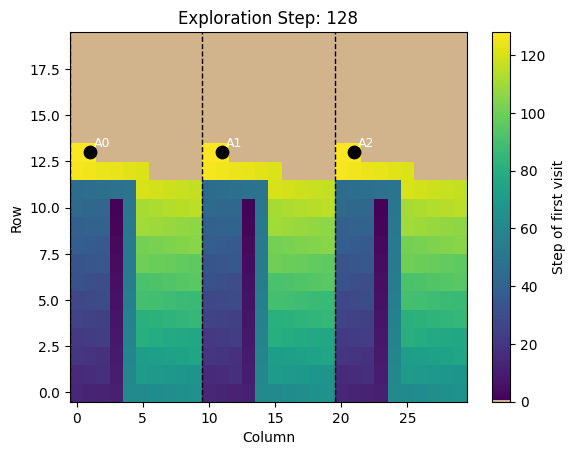

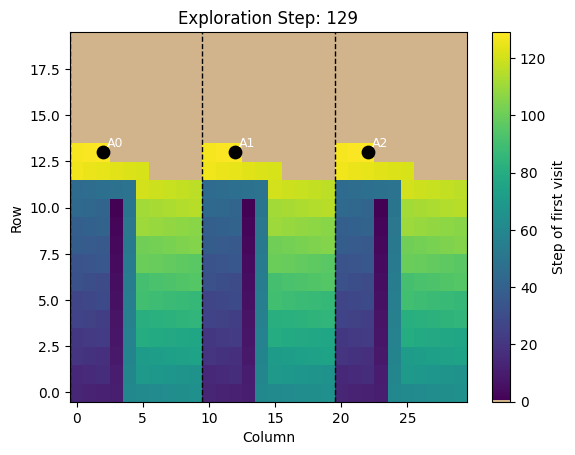

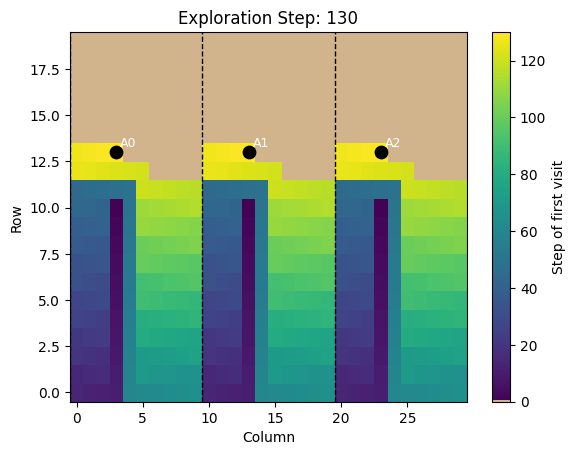

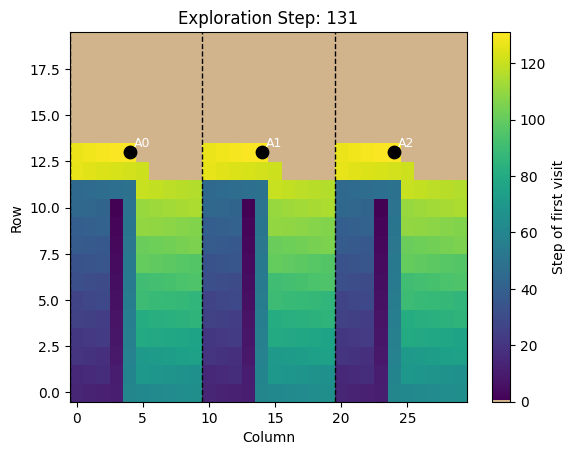

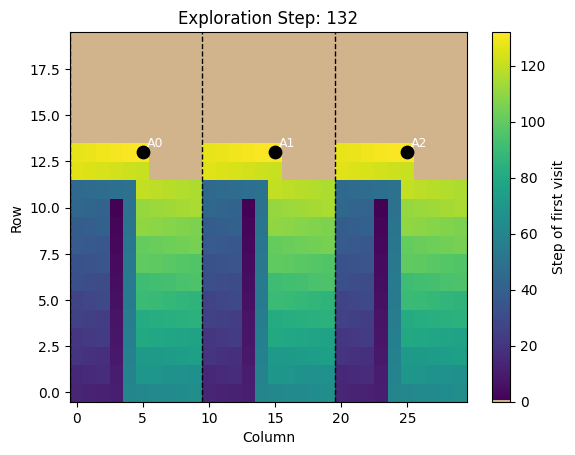

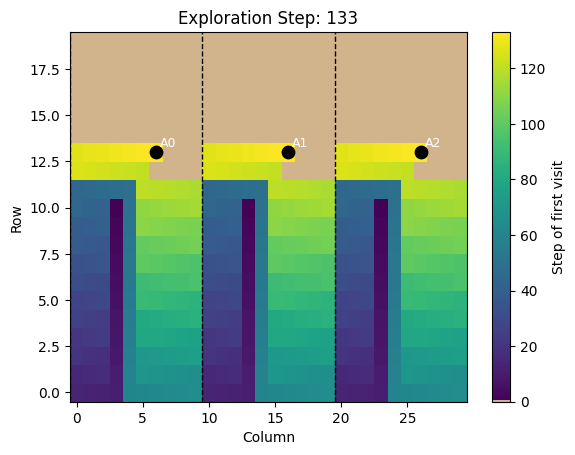

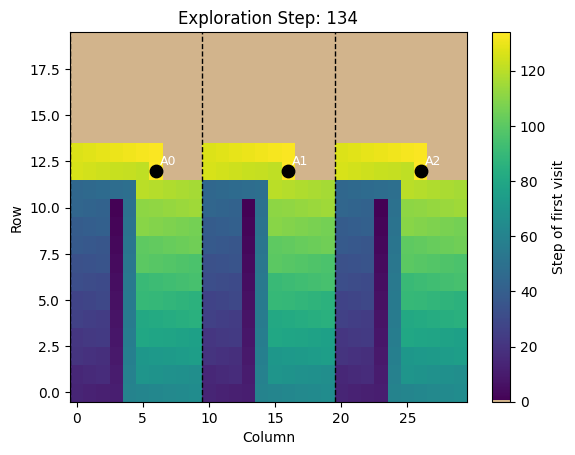

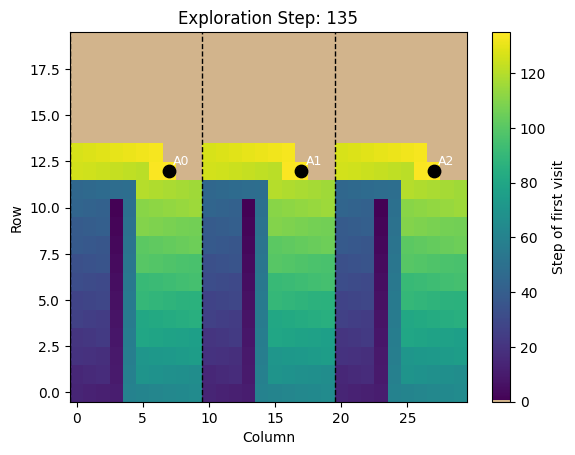

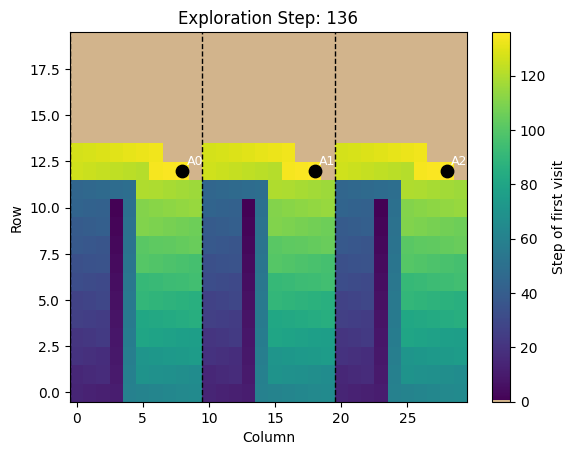

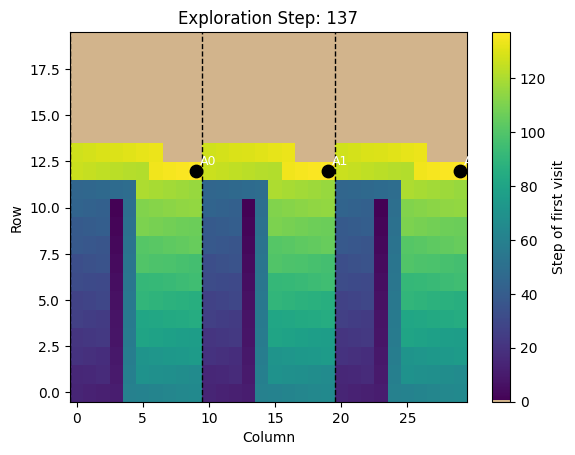

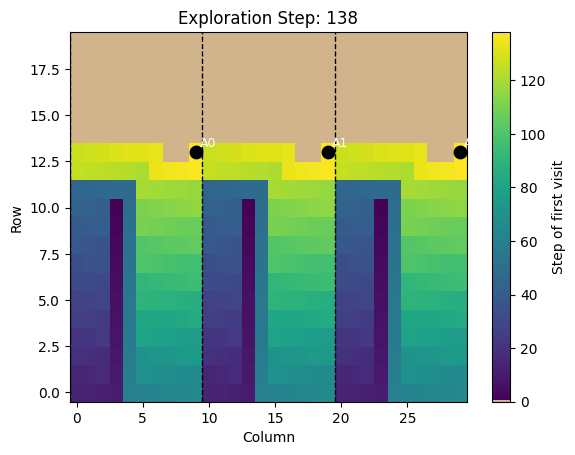

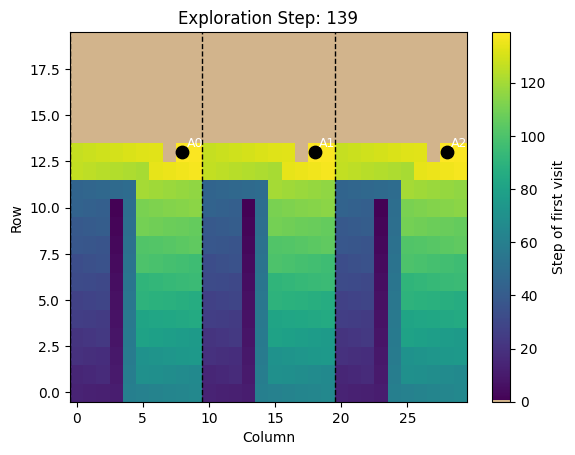

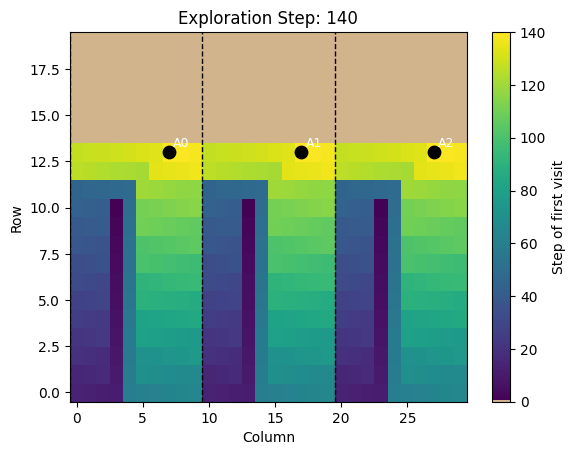

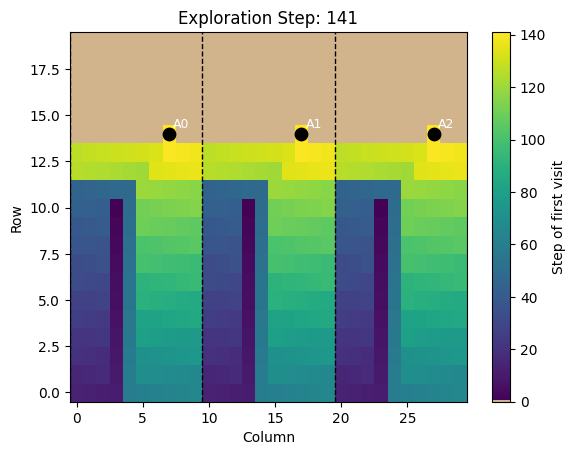

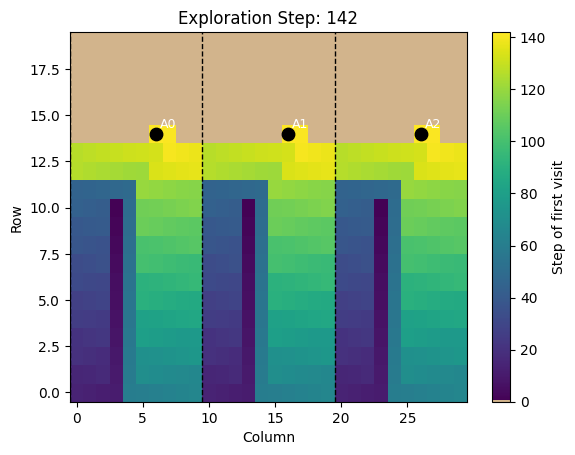

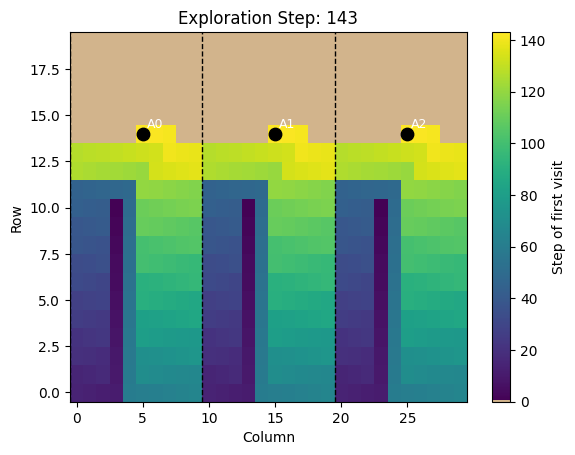

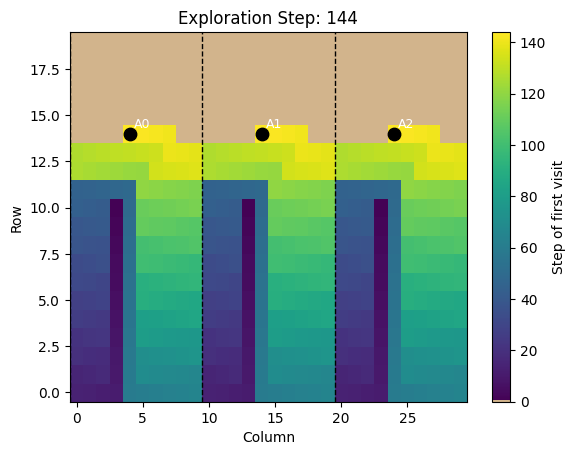

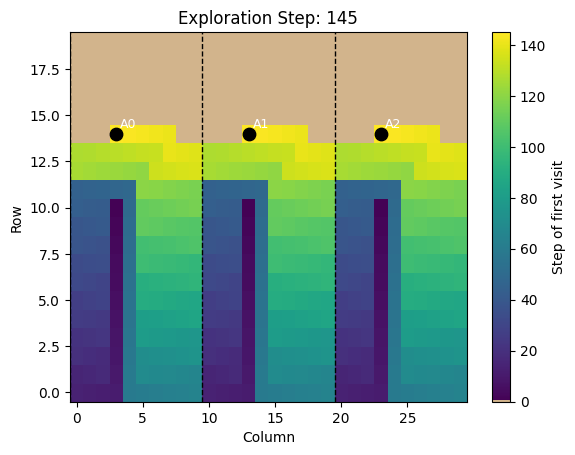

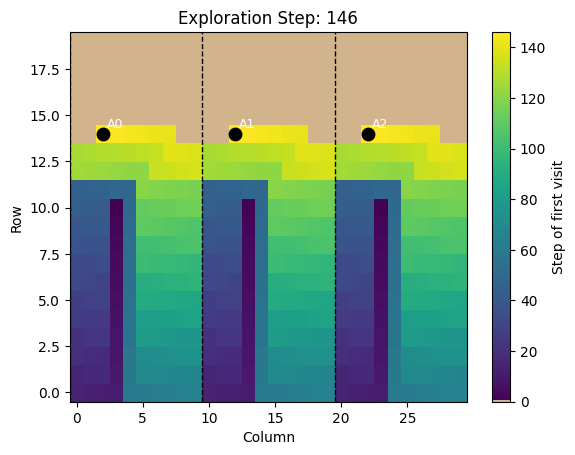

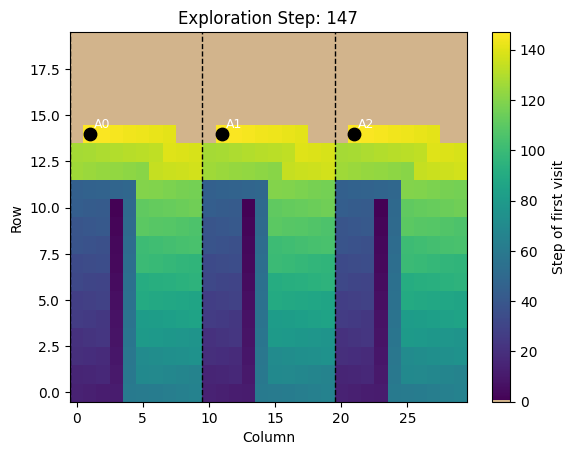

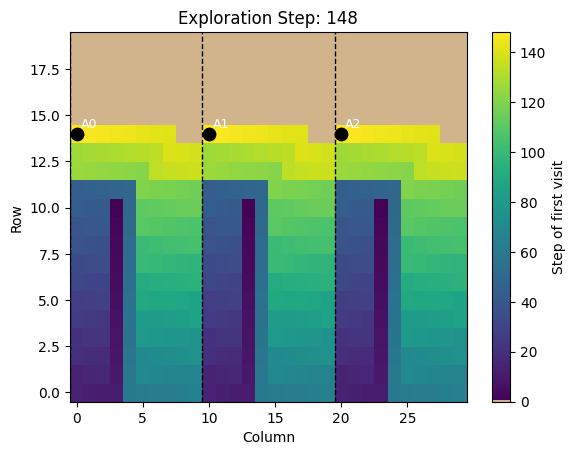

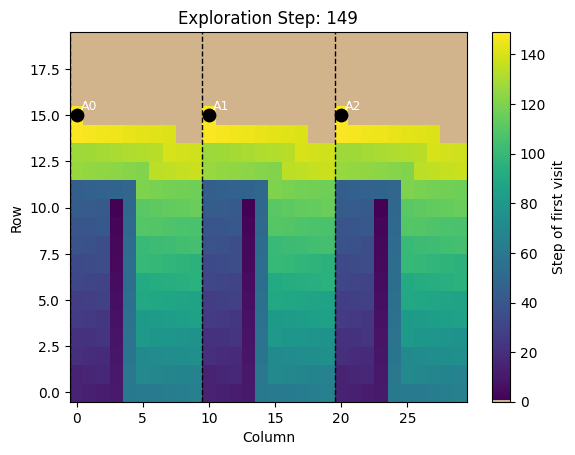

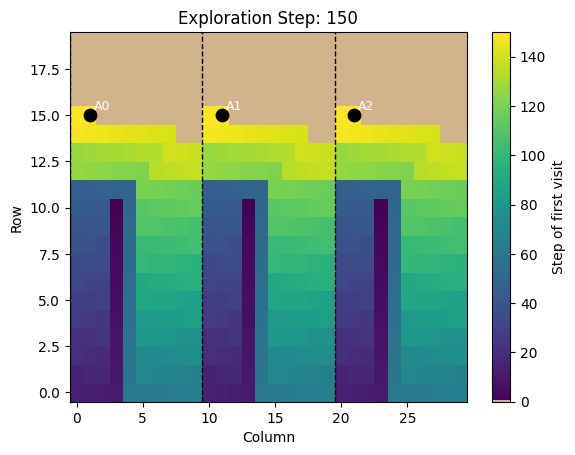

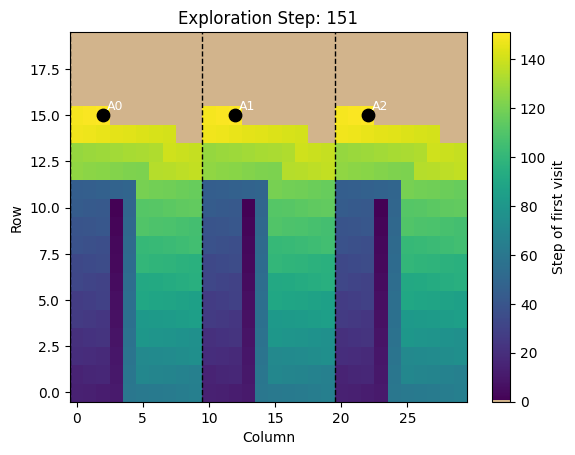

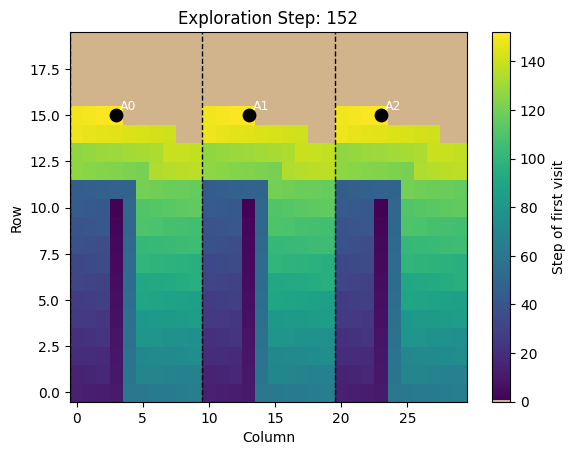

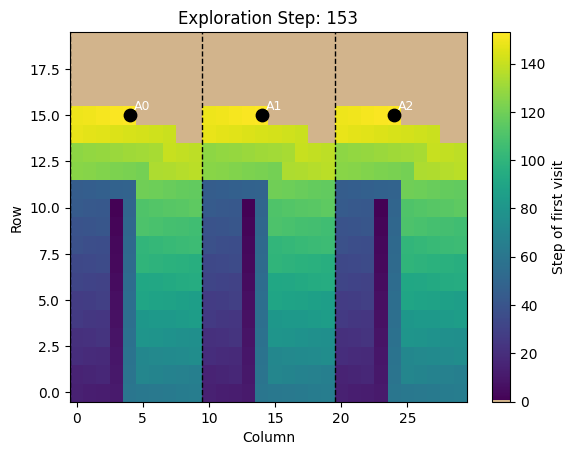

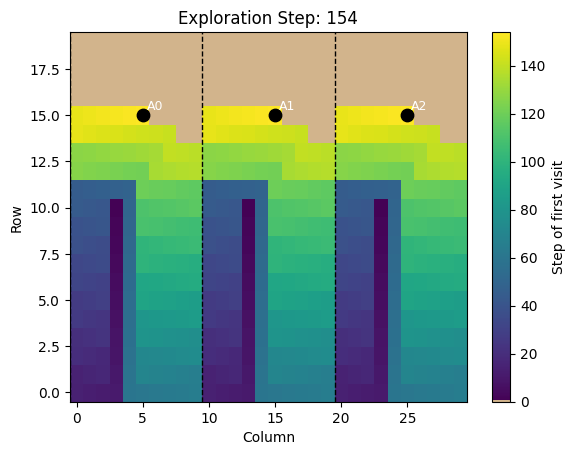

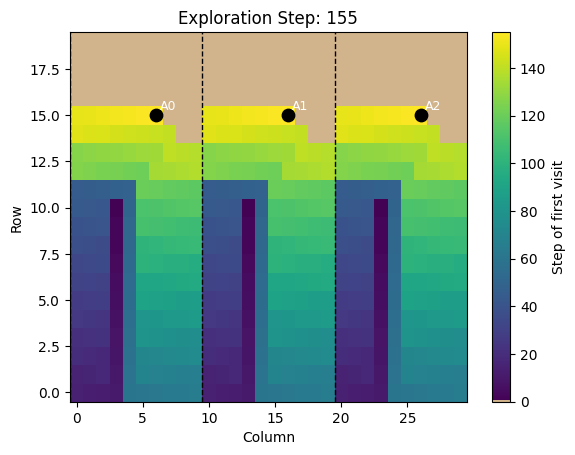

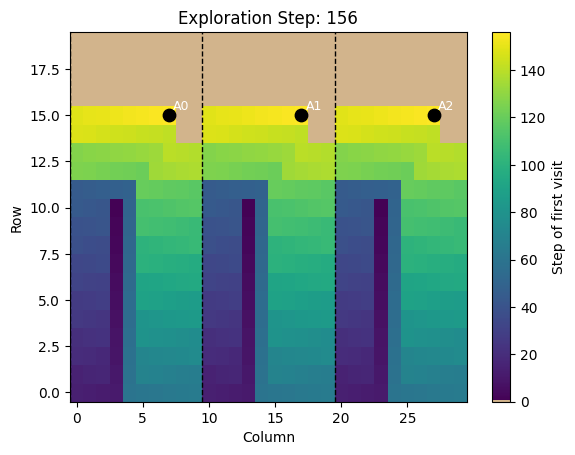

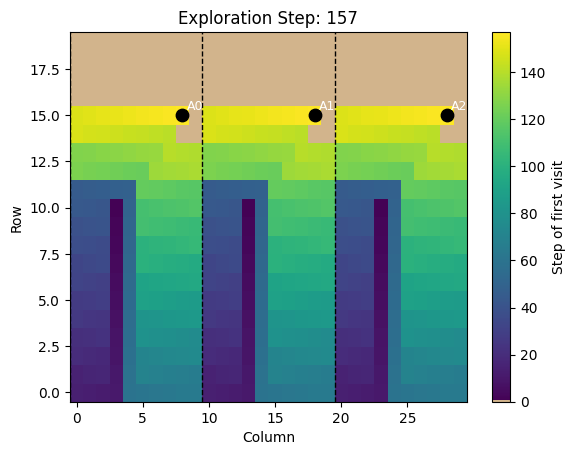

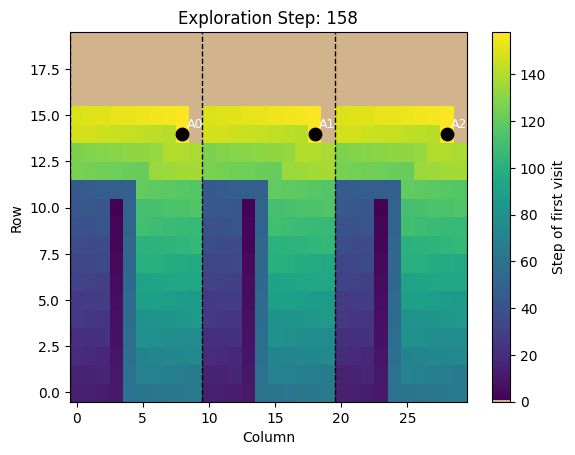

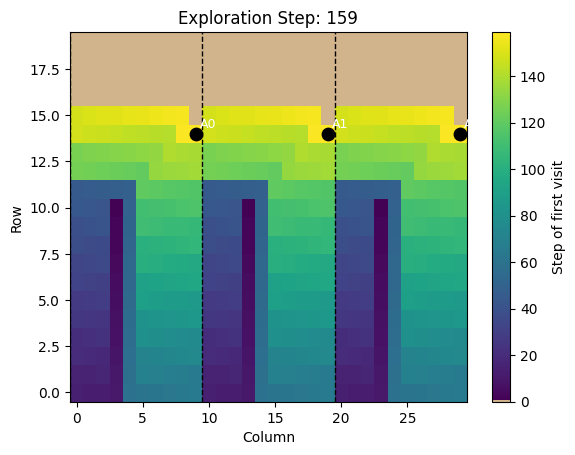

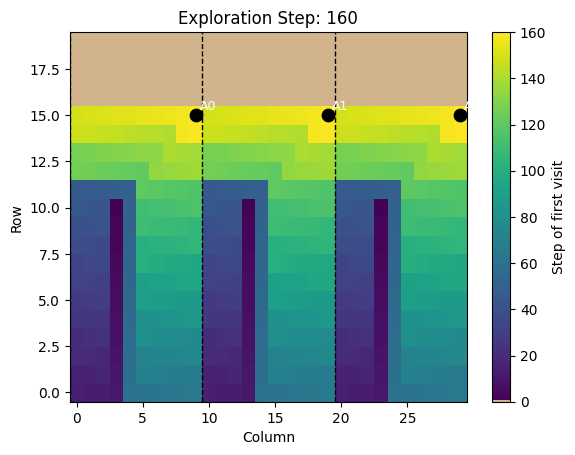

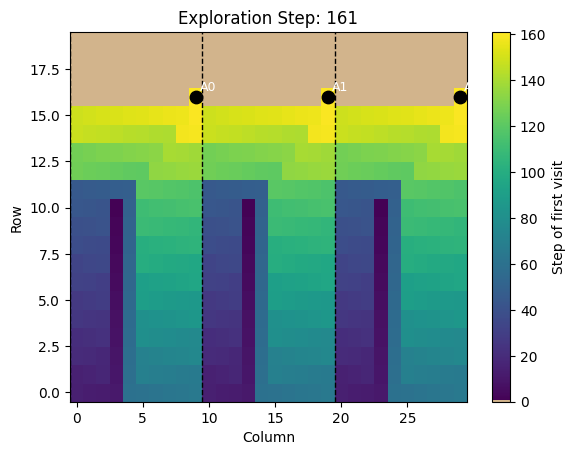

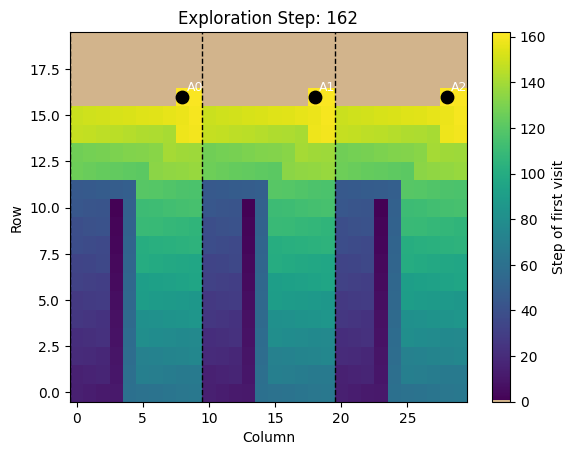

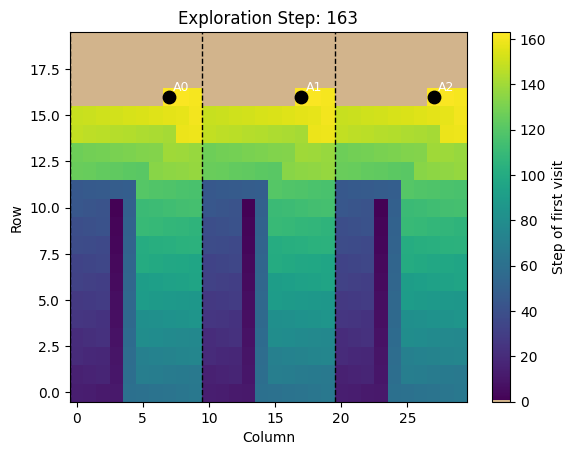

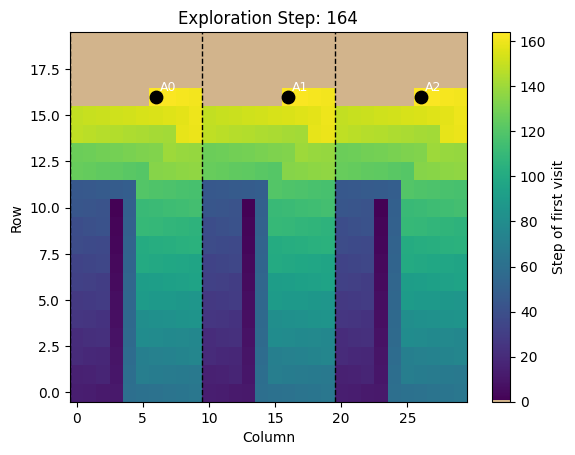

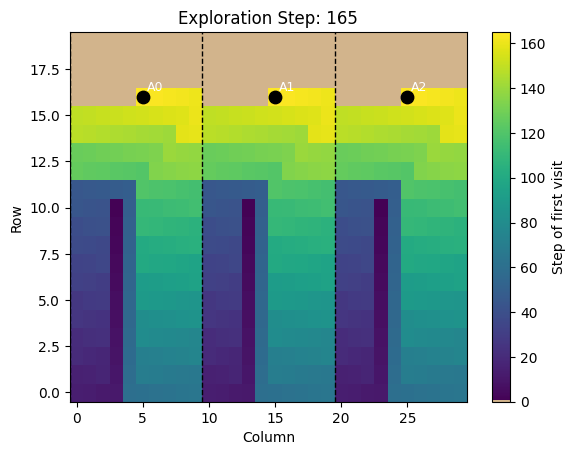

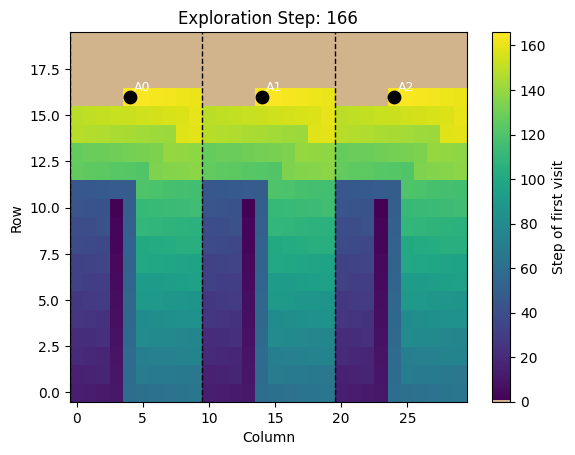

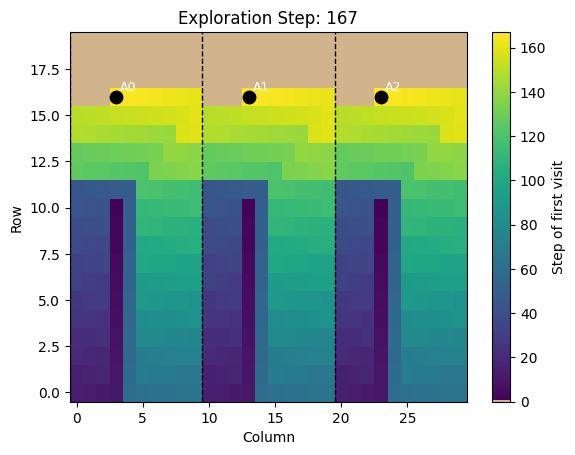

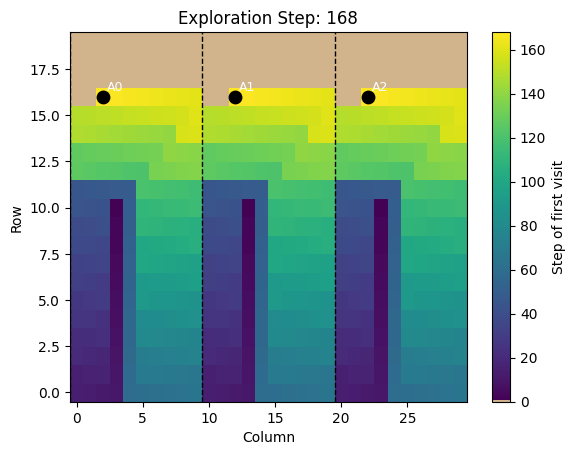

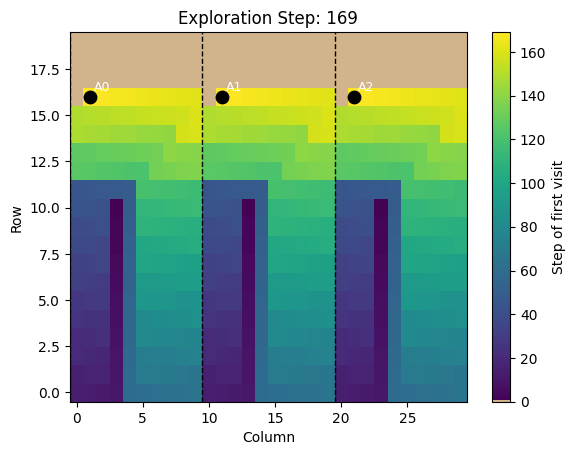

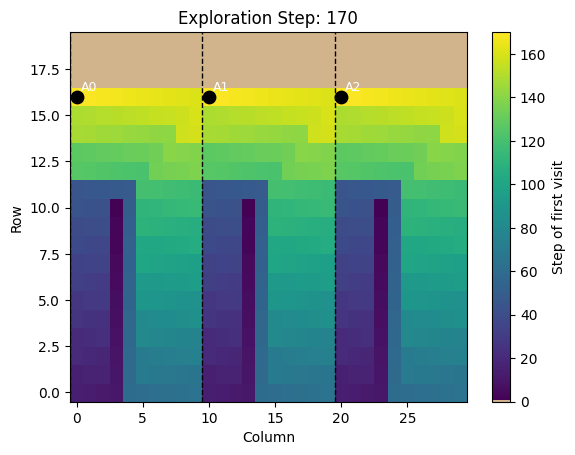

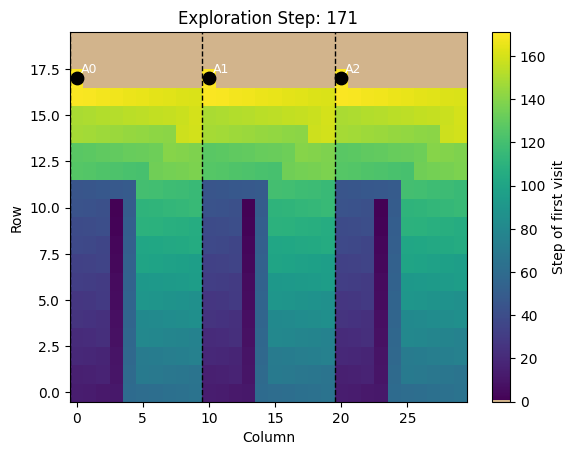

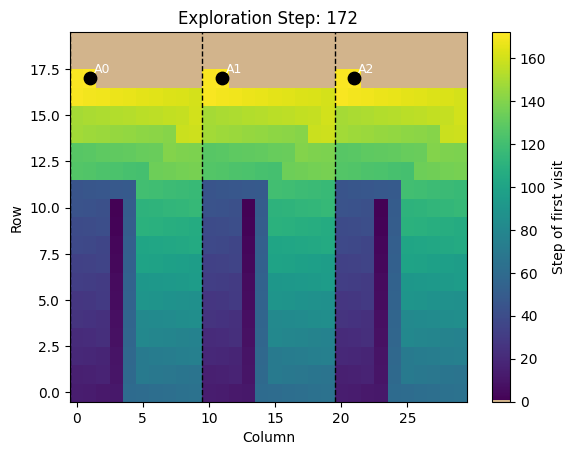

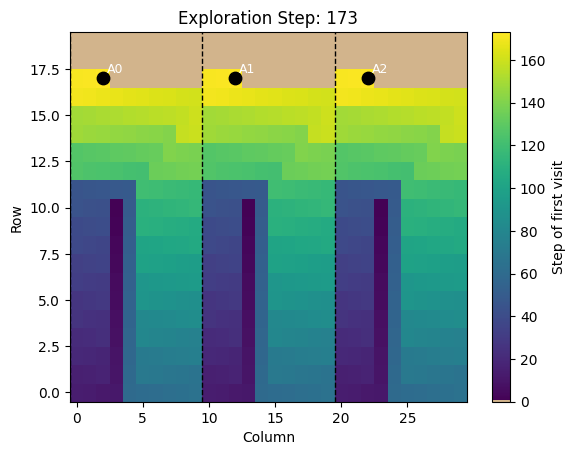

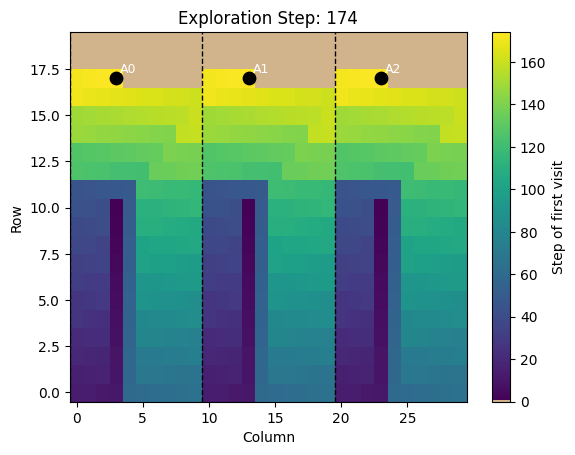

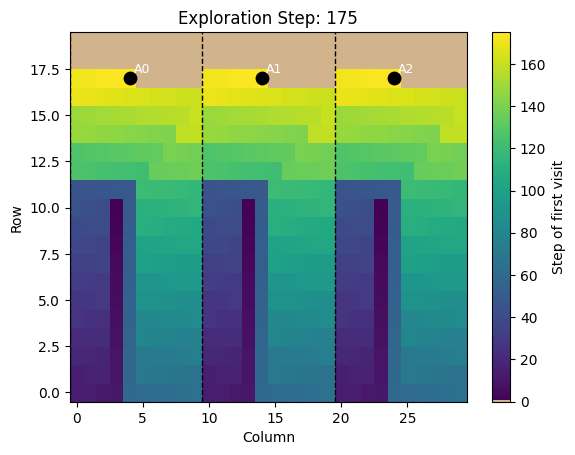

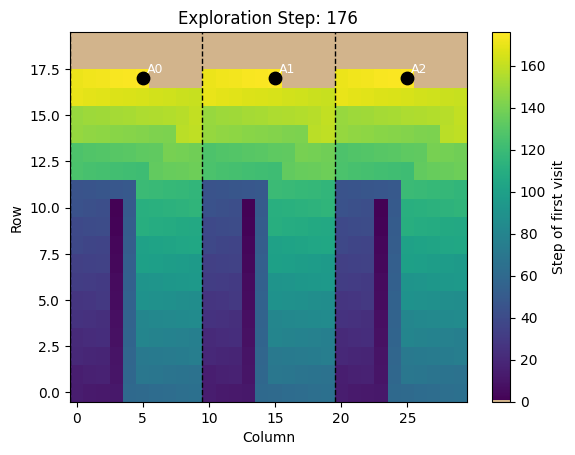

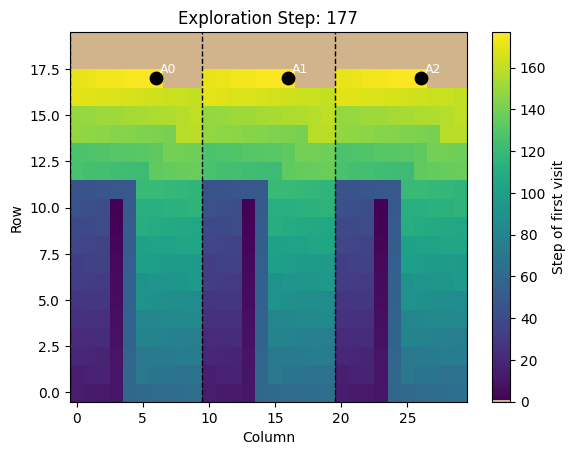

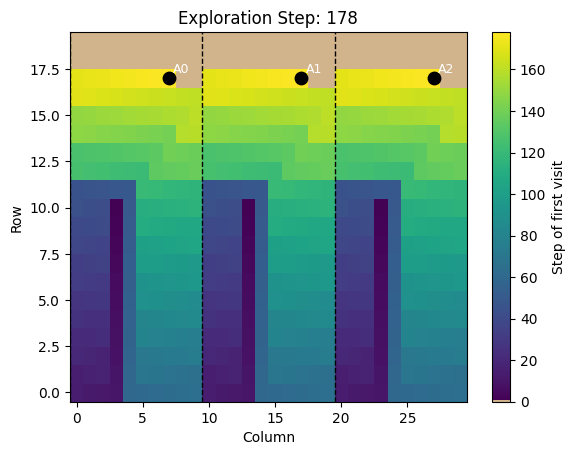

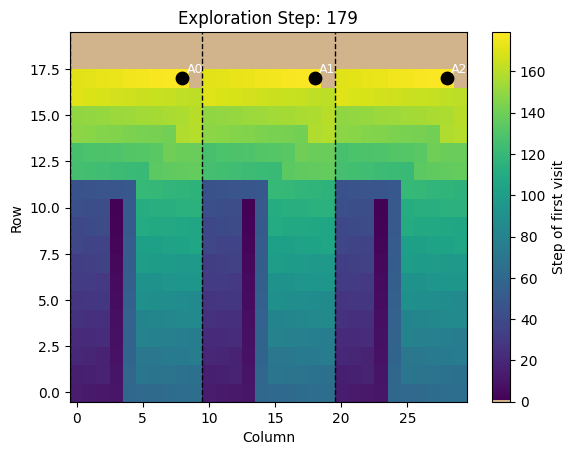

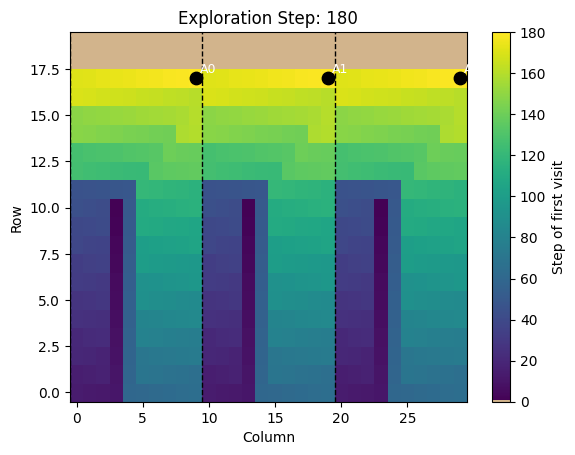

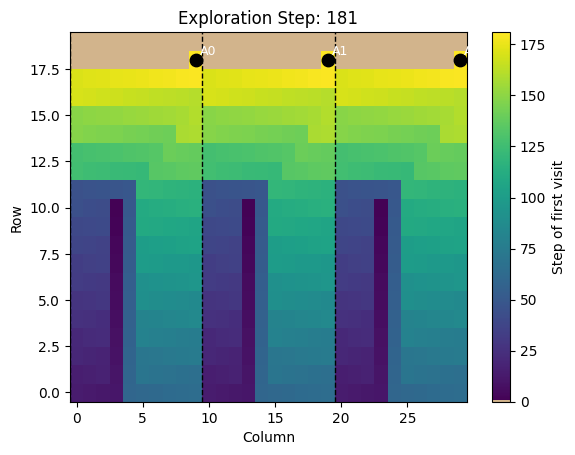

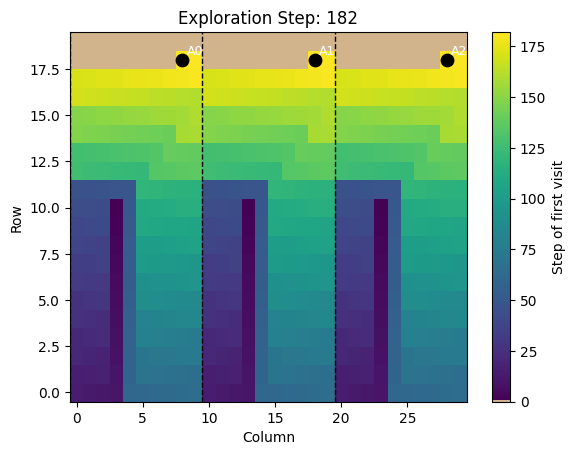

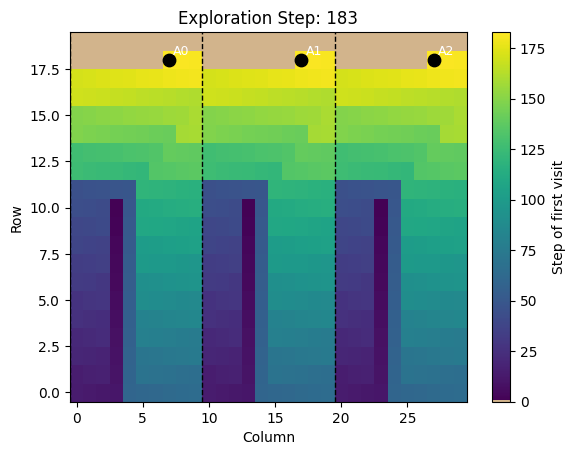

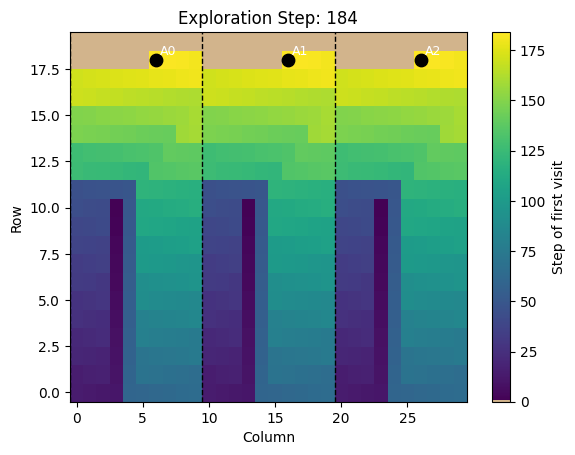

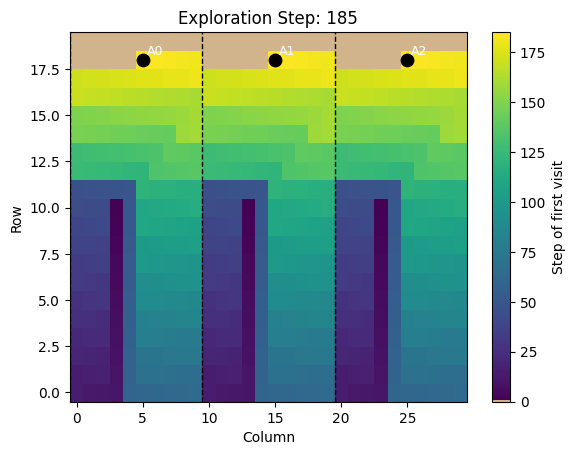

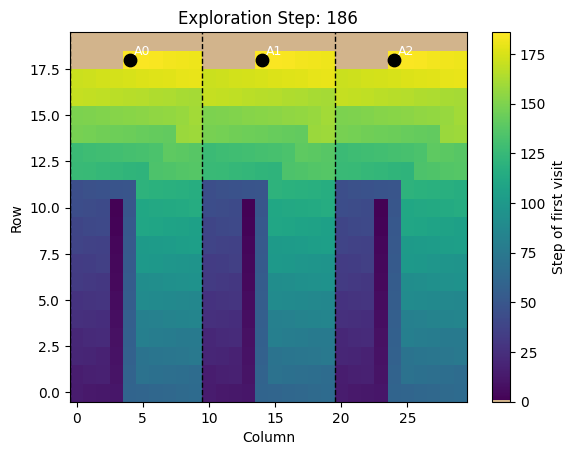

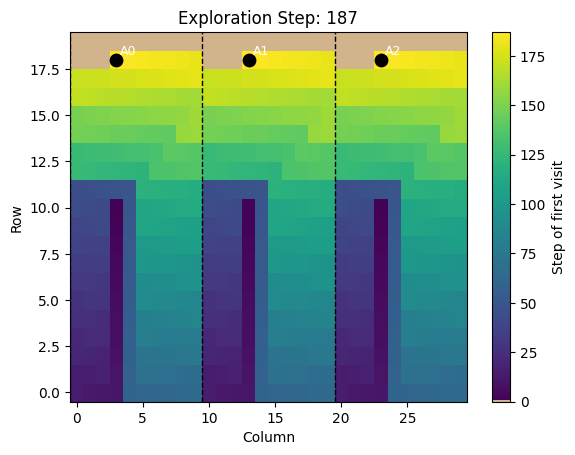

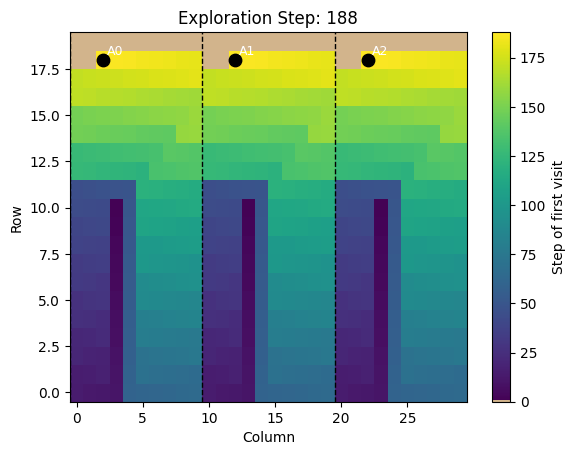

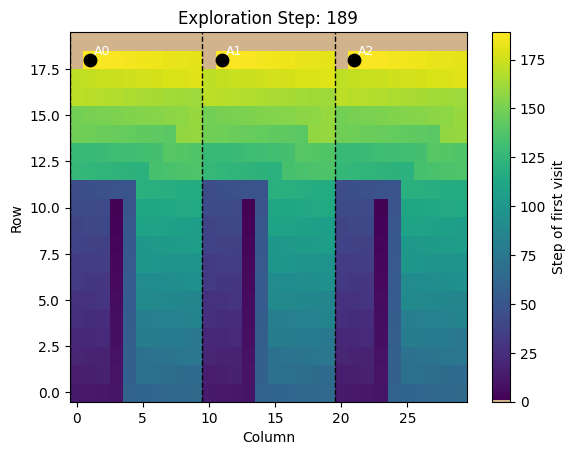

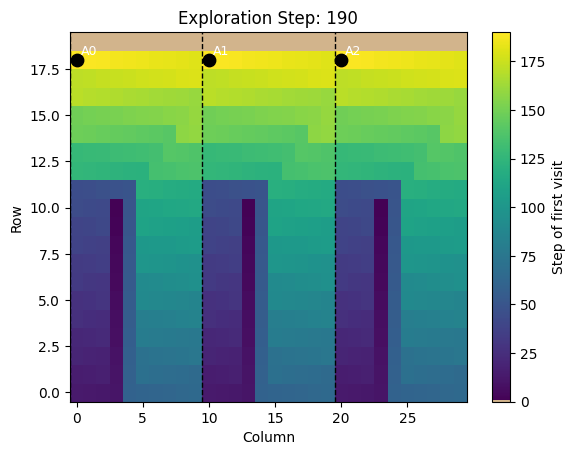

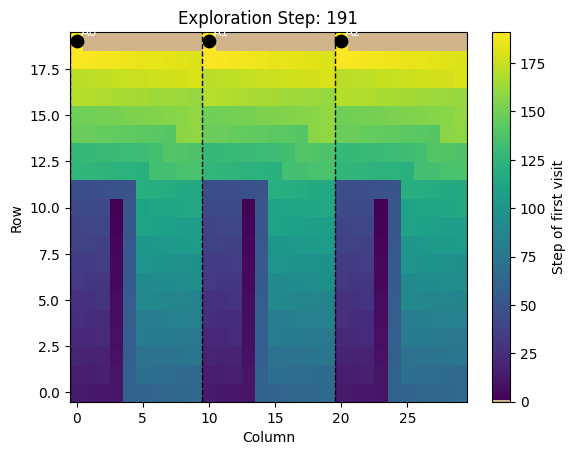

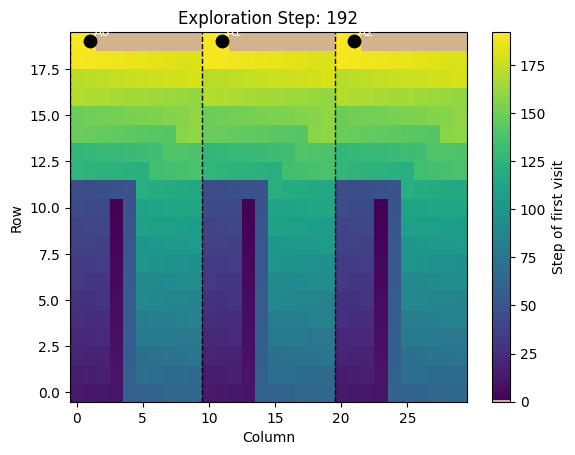

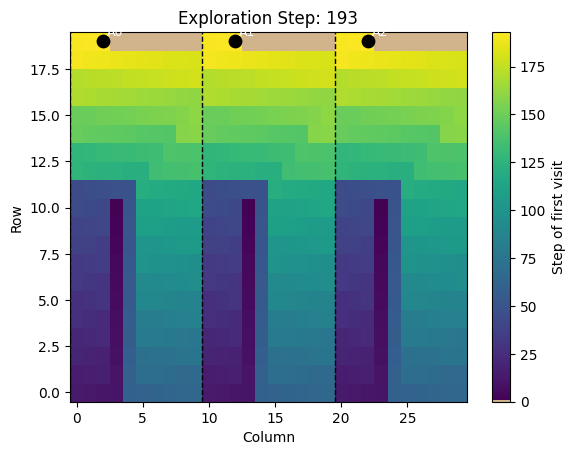

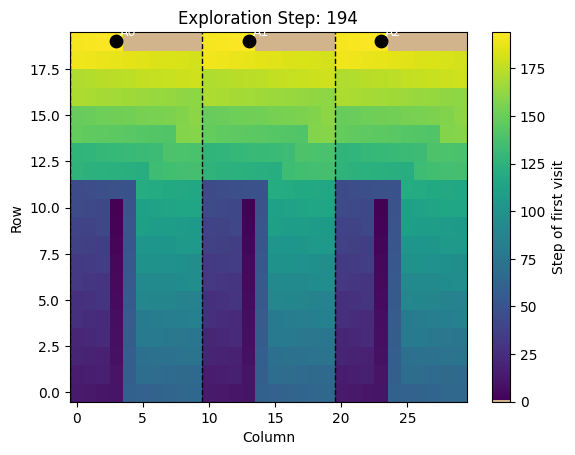

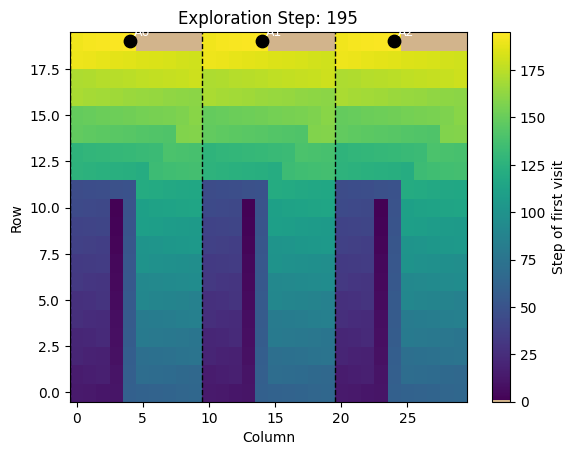

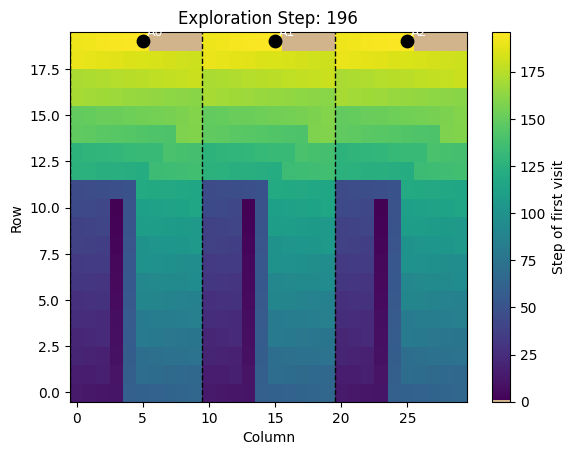

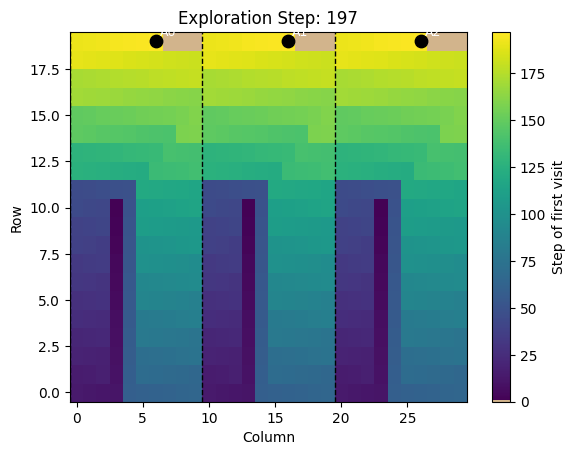

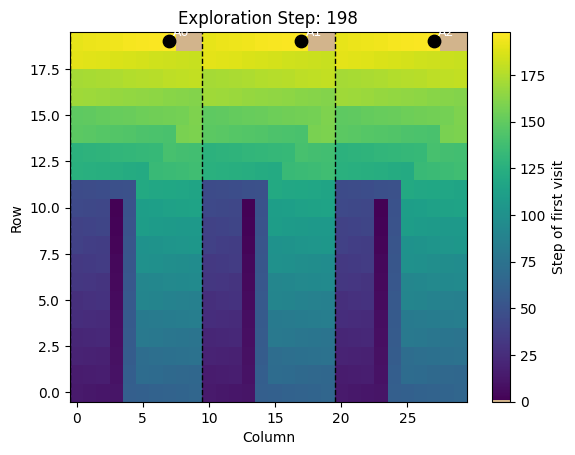

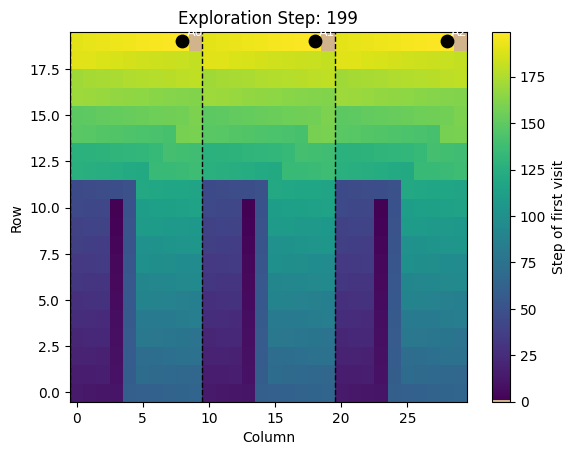

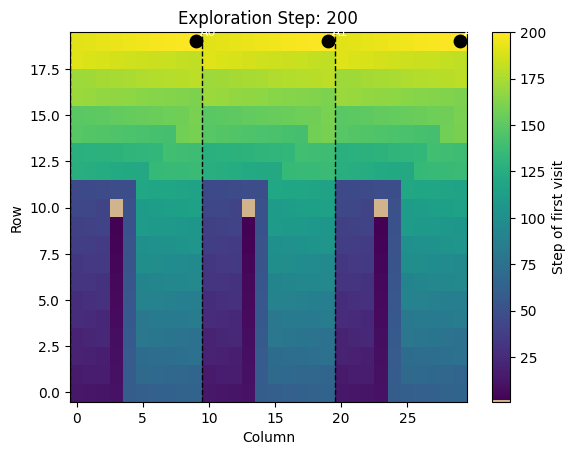

Exploration Finished!


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# -----------------------------------------
# LIGHT BROWN BACKGROUND + VIRIDIS OVERLAY
# -----------------------------------------

# Create a colormap starting with beige background
cmap_colors = ["#d2b48c"] + [plt.cm.viridis(i/255) for i in range(1,256)]
cmap = ListedColormap(cmap_colors)

# -----------------------------------------
# SIMPLE MULTI-AGENT MAP EXPLORATION (ANIMATED)
# -----------------------------------------

ROWS = 20
COLS = 30
AGENTS = 3

first_visit = np.full((ROWS, COLS), -1)

# Partition the grid by columns
partition_size = COLS // AGENTS
partitions = []
start = 0
for i in range(AGENTS):
    end = start + partition_size - 1
    if i == AGENTS - 1:
        end = COLS - 1
    partitions.append((start, end))
    start = end + 1

# Initialize agents
agents = []
for pid, (c0, c1) in enumerate(partitions):
    agents.append([ROWS // 2, (c0 + c1) // 2])

# -----------------------------------------
# Helper
# -----------------------------------------
def nearest_unexplored(r, c, c0, c1):
    best = None
    best_dist = None
    for rr in range(ROWS):
        for cc in range(c0, c1 + 1):
            if first_visit[rr, cc] == -1:
                d = abs(rr - r) + abs(cc - c)
                if best is None or d < best_dist:
                    best = (rr, cc)
                    best_dist = d
    return best

# -----------------------------------------
# DRAW FUNCTION WITH LIGHT BROWN BACKGROUND
# -----------------------------------------
def draw(step):
    plt.clf()
    display = first_visit.copy()
    display[display == -1] = 0  # shows beige for unvisited

    plt.imshow(display, origin='lower', aspect='auto', cmap=cmap)
    plt.colorbar(label="Step of first visit")
    plt.title(f"Exploration Step: {step}")
    plt.xlabel("Column")
    plt.ylabel("Row")

    # Draw agents
    for pid, (r, c) in enumerate(agents):
        plt.scatter(c, r, s=80, color="black")
        plt.text(c + 0.3, r + 0.3, f"A{pid}", color="white", fontsize=9)

    # Draw partition boundaries
    for (c0, c1) in partitions:
        plt.axvline(x=c0 - 0.5, linestyle="--", color="black", linewidth=1)

    plt.pause(0.05)

# -----------------------------------------
# SIMULATION LOOP
# -----------------------------------------
step = 0
total_cells = ROWS * COLS
explored = 0

plt.figure(figsize=(10, 6))

while explored < total_cells:
    step += 1

    for pid, (r, c) in enumerate(agents):
        c0, c1 = partitions[pid]
        target = nearest_unexplored(r, c, c0, c1)
        if target is None:
            continue

        tr, tc = target

        # move toward target
        if tr != r:
            r += 1 if tr > r else -1
        else:
            c += 1 if tc > c else -1

        agents[pid] = [r, c]

        if first_visit[r, c] == -1:
            first_visit[r, c] = step
            explored += 1

    draw(step)

plt.show()
print("Exploration Finished!")
